In [1]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

#from tensorflow.python.framework import ops

from numpy import save
from numpy import load

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import Input, Model

In [2]:
X = load('G:/Desktop/cat dog/data50.npy')
y = load('G:/Desktop/cat dog/y50.npy')

In [3]:
X = X.T 
y = y.reshape(45091,1)

In [4]:
X.shape, y.shape

((45091, 30000), (45091, 1))

In [4]:
x_train = X[:36000]
y_train = y[:36000]
x_dev = X[36000:40500]
y_dev = y[36000:40500]
x_test = X[40500:]
y_test = y[40500:]

In [5]:
x_train.shape,y_train.shape,x_dev.shape,y_dev.shape,x_test.shape,y_test.shape

((36000, 30000),
 (36000, 1),
 (4500, 30000),
 (4500, 1),
 (4591, 30000),
 (4591, 1))

In [7]:
%%time
x_in = Input(shape=(30000,))
x = Dense(300,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros')(x_in)

x = tf.keras.layers.BatchNormalization(trainable=True)(x)
x = Dense(225,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros')(x)

x = tf.keras.layers.BatchNormalization(trainable=True)(x)
x = Dense(70,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros')(x)

x = tf.keras.layers.BatchNormalization(trainable=True)(x)
x_out = Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',
    bias_initializer='zeros')(x)

Wall time: 13.7 s


In [8]:
model = Model(inputs=x_in, outputs=x_out)

In [9]:
%%time
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='binary_crossentropy', metrics=['accuracy'])

bigger_history = model.fit(x_train, y_train, epochs=75, batch_size=512,validation_data = (x_dev, y_dev))

Train on 36000 samples, validate on 4500 samples
Epoch 1/75
36000/36000 [==============================] - 8s 211us/sample - loss: 0.6563 - accuracy: 0.6266 - val_loss: 0.7741 - val_accuracy: 0.5233
Epoch 2/75
36000/36000 [==============================] - 3s 95us/sample - loss: 0.5733 - accuracy: 0.6996 - val_loss: 0.6580 - val_accuracy: 0.6096
Epoch 3/75
36000/36000 [==============================] - 4s 101us/sample - loss: 0.5241 - accuracy: 0.7419 - val_loss: 0.8090 - val_accuracy: 0.5476
Epoch 4/75
36000/36000 [==============================] - 3s 96us/sample - loss: 0.4734 - accuracy: 0.7808 - val_loss: 0.7183 - val_accuracy: 0.6464
Epoch 5/75
36000/36000 [==============================] - 4s 101us/sample - loss: 0.4257 - accuracy: 0.8140 - val_loss: 0.6358 - val_accuracy: 0.6518
Epoch 6/75
36000/36000 [==============================] - 4s 99us/sample - loss: 0.3819 - accuracy: 0.8438 - val_loss: 0.6094 - val_accuracy: 0.6749
Epoch 7/75
36000/36000 [==============================

36000/36000 [==============================] - 4s 99us/sample - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.6946 - val_accuracy: 0.8173
Epoch 56/75
36000/36000 [==============================] - 4s 102us/sample - loss: 9.3038e-04 - accuracy: 1.0000 - val_loss: 0.6894 - val_accuracy: 0.8193
Epoch 57/75
36000/36000 [==============================] - 4s 99us/sample - loss: 8.6784e-04 - accuracy: 1.0000 - val_loss: 0.7254 - val_accuracy: 0.8100
Epoch 58/75
36000/36000 [==============================] - 4s 106us/sample - loss: 7.9926e-04 - accuracy: 1.0000 - val_loss: 0.7160 - val_accuracy: 0.8193
Epoch 59/75
36000/36000 [==============================] - 4s 100us/sample - loss: 7.9093e-04 - accuracy: 1.0000 - val_loss: 0.7843 - val_accuracy: 0.8027
Epoch 60/75
36000/36000 [==============================] - 4s 99us/sample - loss: 7.6722e-04 - accuracy: 1.0000 - val_loss: 0.7153 - val_accuracy: 0.8176
Epoch 61/75
36000/36000 [==============================] - 3s 95us/sample - loss: 6.9526e

In [10]:
model.evaluate(x_dev, y_dev)

4500/4500 [==============================] - 5s 1ms/sample - loss: 0.6743 - accuracy: 0.8122


[0.6742684720887078, 0.81222224]

In [11]:
model.evaluate(x_test, y_test)

4591/4591 [==============================] - 2s 465us/sample - loss: 0.7627 - accuracy: 0.7953


[0.7627130564114765, 0.7952516]

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30000)]           0         
_________________________________________________________________
dense (Dense)                (None, 300)               9000300   
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 225)               67725     
_________________________________________________________________
batch_normalization_1 (Batch (None, 225)               900       
_________________________________________________________________
dense_2 (Dense)              (None, 70)                15820     
_________________________________________________________________
batch_normalization_2 (Batch (None, 70)                280   

In [ ]:
model.evaluate(x_dev, y_dev)

In [ ]:
model.evaluate(x_dev, y_dev)

In [ ]:
a.append(('model2', bigger_history))

In [13]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                               '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                         label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

In [ ]:
plot_history(a)

In [ ]:
a = []

In [ ]:
max(bigger_history.history['val_accuracy'])

In [ ]:
j = 0
for i in bigger_history.history['val_accuracy']:
    if i == max(bigger_history.history['val_accuracy']):
        print(j)
    j += 1

In [ ]:
bigger_history.history['val_accuracy'][58]

In [10]:
from kerastuner.tuners import RandomSearch

In [7]:
from kerastuner.tuners import Hyperband

In [8]:
def builder_m(hp):
    x_in = Input(shape=(30000,))
    x = Dense(units=hp.Int('unit1', min_value=250, max_value=500, step=10, default=300),
              activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros')(x_in)

    x = tf.keras.layers.BatchNormalization(trainable=True)(x)
    x = Dense(units=hp.Int('unit2', min_value=150, max_value=400, step=5, default=225),
              activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros')(x)

    x = tf.keras.layers.BatchNormalization(trainable=True)(x)
    x = Dense(units=hp.Int('unit3', min_value=30, max_value=150, step=5, default=70),
              activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros')(x)

    x = tf.keras.layers.BatchNormalization(trainable=True)(x)
    x_out = Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',
        bias_initializer='zeros')(x)

    model = Model(inputs=x_in, outputs=x_out)
    
    model.compile(optimizer=keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
            loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
tuner = Hyperband(builder_m,objective='val_accuracy', max_epochs = 50б
                 directory = 'my_dir',
    project_name = 'intro_to_kt')

In [16]:
HYPERBAND_MAX_EPOCHS = 30
MAX_TRIALS = 10
EXECUTION_PER_TRIAL = 1

tuner = RandomSearch(
    builder_m,
    objective='val_accuracy',
    seed=1,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory = 'my_dir',
    project_name = 'intro_to_kt'
)

INFO:tensorflow:Reloading Oracle from existing project my_dir\intro_to_kt\oracle.json


In [17]:
tuner.search_space_summary()

In [18]:
%%time
tuner.search(x_train, y_train, epochs=40, batch_size=256, validation_data=(x_dev, y_dev))

Train on 36000 samples, validate on 4500 samples
Epoch 1/40
36000/36000 [==============================] - ETA: 5:50 - loss: 1.0290 - accuracy: 0.44 - ETA: 1:59 - loss: 1.0995 - accuracy: 0.52 - ETA: 1:30 - loss: 1.0318 - accuracy: 0.53 - ETA: 1:13 - loss: 0.9789 - accuracy: 0.53 - ETA: 53s - loss: 0.9080 - accuracy: 0.5346 - ETA: 42s - loss: 0.8596 - accuracy: 0.543 - ETA: 38s - loss: 0.8435 - accuracy: 0.547 - ETA: 35s - loss: 0.8268 - accuracy: 0.551 - ETA: 32s - loss: 0.8158 - accuracy: 0.555 - ETA: 28s - loss: 0.7913 - accuracy: 0.566 - ETA: 26s - loss: 0.7820 - accuracy: 0.568 - ETA: 25s - loss: 0.7736 - accuracy: 0.572 - ETA: 22s - loss: 0.7638 - accuracy: 0.576 - ETA: 21s - loss: 0.7614 - accuracy: 0.575 - ETA: 19s - loss: 0.7523 - accuracy: 0.579 - ETA: 18s - loss: 0.7463 - accuracy: 0.583 - ETA: 18s - loss: 0.7419 - accuracy: 0.585 - ETA: 17s - loss: 0.7398 - accuracy: 0.584 - ETA: 16s - loss: 0.7332 - accuracy: 0.587 - ETA: 15s - loss: 0.7302 - accuracy: 0.586 - ETA: 15s - l

Epoch 4/40
36000/36000 [==============================] - ETA: 6s - loss: 0.4793 - accuracy: 0.81 - ETA: 7s - loss: 0.4796 - accuracy: 0.79 - ETA: 7s - loss: 0.4900 - accuracy: 0.78 - ETA: 6s - loss: 0.4881 - accuracy: 0.78 - ETA: 6s - loss: 0.4946 - accuracy: 0.77 - ETA: 5s - loss: 0.4889 - accuracy: 0.77 - ETA: 5s - loss: 0.4911 - accuracy: 0.77 - ETA: 5s - loss: 0.4869 - accuracy: 0.77 - ETA: 5s - loss: 0.4846 - accuracy: 0.77 - ETA: 5s - loss: 0.4830 - accuracy: 0.77 - ETA: 5s - loss: 0.4830 - accuracy: 0.77 - ETA: 5s - loss: 0.4835 - accuracy: 0.77 - ETA: 5s - loss: 0.4847 - accuracy: 0.77 - ETA: 5s - loss: 0.4867 - accuracy: 0.77 - ETA: 5s - loss: 0.4881 - accuracy: 0.76 - ETA: 5s - loss: 0.4877 - accuracy: 0.77 - ETA: 5s - loss: 0.4890 - accuracy: 0.76 - ETA: 5s - loss: 0.4878 - accuracy: 0.76 - ETA: 5s - loss: 0.4861 - accuracy: 0.77 - ETA: 5s - loss: 0.4861 - accuracy: 0.77 - ETA: 5s - loss: 0.4844 - accuracy: 0.77 - ETA: 5s - loss: 0.4857 - accuracy: 0.76 - ETA: 5s - loss: 0.

36000/36000 [==============================] - ETA: 5s - loss: 0.3279 - accuracy: 0.87 - ETA: 5s - loss: 0.3347 - accuracy: 0.86 - ETA: 6s - loss: 0.3287 - accuracy: 0.87 - ETA: 5s - loss: 0.3304 - accuracy: 0.86 - ETA: 6s - loss: 0.3246 - accuracy: 0.86 - ETA: 5s - loss: 0.3246 - accuracy: 0.86 - ETA: 5s - loss: 0.3209 - accuracy: 0.86 - ETA: 5s - loss: 0.3155 - accuracy: 0.87 - ETA: 5s - loss: 0.3109 - accuracy: 0.87 - ETA: 5s - loss: 0.3114 - accuracy: 0.87 - ETA: 5s - loss: 0.3111 - accuracy: 0.87 - ETA: 5s - loss: 0.3113 - accuracy: 0.87 - ETA: 5s - loss: 0.3123 - accuracy: 0.87 - ETA: 5s - loss: 0.3100 - accuracy: 0.87 - ETA: 5s - loss: 0.3087 - accuracy: 0.87 - ETA: 5s - loss: 0.3069 - accuracy: 0.87 - ETA: 5s - loss: 0.3058 - accuracy: 0.87 - ETA: 5s - loss: 0.3048 - accuracy: 0.87 - ETA: 5s - loss: 0.3049 - accuracy: 0.87 - ETA: 5s - loss: 0.3033 - accuracy: 0.87 - ETA: 5s - loss: 0.3031 - accuracy: 0.87 - ETA: 4s - loss: 0.3032 - accuracy: 0.87 - ETA: 4s - loss: 0.3047 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.1630 - accuracy: 0.92 - ETA: 5s - loss: 0.1724 - accuracy: 0.93 - ETA: 5s - loss: 0.1689 - accuracy: 0.93 - ETA: 5s - loss: 0.1643 - accuracy: 0.94 - ETA: 5s - loss: 0.1665 - accuracy: 0.94 - ETA: 5s - loss: 0.1677 - accuracy: 0.94 - ETA: 5s - loss: 0.1664 - accuracy: 0.94 - ETA: 5s - loss: 0.1695 - accuracy: 0.94 - ETA: 5s - loss: 0.1688 - accuracy: 0.94 - ETA: 5s - loss: 0.1669 - accuracy: 0.94 - ETA: 5s - loss: 0.1654 - accuracy: 0.94 - ETA: 5s - loss: 0.1684 - accuracy: 0.94 - ETA: 5s - loss: 0.1690 - accuracy: 0.94 - ETA: 5s - loss: 0.1695 - accuracy: 0.94 - ETA: 5s - loss: 0.1725 - accuracy: 0.93 - ETA: 4s - loss: 0.1718 - accuracy: 0.94 - ETA: 4s - loss: 0.1732 - accuracy: 0.93 - ETA: 4s - loss: 0.1736 - accuracy: 0.93 - ETA: 4s - loss: 0.1744 - accuracy: 0.93 - ETA: 4s - loss: 0.1761 - accuracy: 0.93 - ETA: 4s - loss: 0.1755 - accuracy: 0.93 - ETA: 4s - loss: 0.1760 - accuracy: 0.93 - ETA: 4s - loss: 0.1755 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.1289 - accuracy: 0.95 - ETA: 5s - loss: 0.1337 - accuracy: 0.94 - ETA: 5s - loss: 0.1284 - accuracy: 0.94 - ETA: 5s - loss: 0.1300 - accuracy: 0.95 - ETA: 5s - loss: 0.1327 - accuracy: 0.95 - ETA: 5s - loss: 0.1285 - accuracy: 0.95 - ETA: 5s - loss: 0.1260 - accuracy: 0.95 - ETA: 5s - loss: 0.1257 - accuracy: 0.95 - ETA: 5s - loss: 0.1232 - accuracy: 0.95 - ETA: 5s - loss: 0.1209 - accuracy: 0.95 - ETA: 5s - loss: 0.1207 - accuracy: 0.95 - ETA: 5s - loss: 0.1213 - accuracy: 0.95 - ETA: 5s - loss: 0.1222 - accuracy: 0.95 - ETA: 5s - loss: 0.1191 - accuracy: 0.95 - ETA: 5s - loss: 0.1177 - accuracy: 0.95 - ETA: 5s - loss: 0.1179 - accuracy: 0.95 - ETA: 4s - loss: 0.1169 - accuracy: 0.95 - ETA: 4s - loss: 0.1157 - accuracy: 0.95 - ETA: 4s - loss: 0.1150 - accuracy: 0.95 - ETA: 4s - loss: 0.1150 - accuracy: 0.95 - ETA: 4s - loss: 0.1134 - accuracy: 0.96 - ETA: 4s - loss: 0.1132 - accuracy: 0.96 - ETA: 4s - loss: 0.1141 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.0853 - accuracy: 0.97 - ETA: 5s - loss: 0.0721 - accuracy: 0.98 - ETA: 6s - loss: 0.0710 - accuracy: 0.97 - ETA: 5s - loss: 0.0688 - accuracy: 0.97 - ETA: 6s - loss: 0.0688 - accuracy: 0.97 - ETA: 5s - loss: 0.0672 - accuracy: 0.97 - ETA: 5s - loss: 0.0680 - accuracy: 0.97 - ETA: 5s - loss: 0.0643 - accuracy: 0.97 - ETA: 5s - loss: 0.0647 - accuracy: 0.97 - ETA: 5s - loss: 0.0649 - accuracy: 0.97 - ETA: 5s - loss: 0.0665 - accuracy: 0.97 - ETA: 5s - loss: 0.0665 - accuracy: 0.97 - ETA: 5s - loss: 0.0669 - accuracy: 0.97 - ETA: 5s - loss: 0.0659 - accuracy: 0.97 - ETA: 5s - loss: 0.0654 - accuracy: 0.97 - ETA: 5s - loss: 0.0653 - accuracy: 0.97 - ETA: 5s - loss: 0.0653 - accuracy: 0.97 - ETA: 5s - loss: 0.0650 - accuracy: 0.97 - ETA: 5s - loss: 0.0635 - accuracy: 0.97 - ETA: 4s - loss: 0.0622 - accuracy: 0.98 - ETA: 4s - loss: 0.0618 - accuracy: 0.98 - ETA: 4s - loss: 0.0617 - accuracy: 0.98 - ETA: 4s - loss: 0.0614 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0590 - accuracy: 0.97 - ETA: 4s - loss: 0.0576 - accuracy: 0.97 - ETA: 5s - loss: 0.0599 - accuracy: 0.97 - ETA: 5s - loss: 0.0598 - accuracy: 0.97 - ETA: 5s - loss: 0.0560 - accuracy: 0.98 - ETA: 5s - loss: 0.0562 - accuracy: 0.98 - ETA: 5s - loss: 0.0627 - accuracy: 0.97 - ETA: 5s - loss: 0.0607 - accuracy: 0.97 - ETA: 5s - loss: 0.0615 - accuracy: 0.97 - ETA: 5s - loss: 0.0609 - accuracy: 0.97 - ETA: 5s - loss: 0.0610 - accuracy: 0.97 - ETA: 5s - loss: 0.0611 - accuracy: 0.97 - ETA: 5s - loss: 0.0596 - accuracy: 0.97 - ETA: 4s - loss: 0.0579 - accuracy: 0.98 - ETA: 4s - loss: 0.0577 - accuracy: 0.98 - ETA: 4s - loss: 0.0576 - accuracy: 0.98 - ETA: 4s - loss: 0.0571 - accuracy: 0.98 - ETA: 4s - loss: 0.0566 - accuracy: 0.98 - ETA: 4s - loss: 0.0562 - accuracy: 0.98 - ETA: 4s - loss: 0.0555 - accuracy: 0.98 - ETA: 4s - loss: 0.0546 - accuracy: 0.98 - ETA: 4s - loss: 0.0556 - accuracy: 0.98 - ETA: 4s - loss: 0.0545 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.0189 - accuracy: 1.00 - ETA: 6s - loss: 0.0304 - accuracy: 0.99 - ETA: 6s - loss: 0.0477 - accuracy: 0.98 - ETA: 6s - loss: 0.0515 - accuracy: 0.98 - ETA: 6s - loss: 0.0492 - accuracy: 0.98 - ETA: 6s - loss: 0.0471 - accuracy: 0.98 - ETA: 6s - loss: 0.0465 - accuracy: 0.98 - ETA: 5s - loss: 0.0493 - accuracy: 0.98 - ETA: 5s - loss: 0.0489 - accuracy: 0.98 - ETA: 5s - loss: 0.0496 - accuracy: 0.98 - ETA: 5s - loss: 0.0493 - accuracy: 0.98 - ETA: 5s - loss: 0.0498 - accuracy: 0.98 - ETA: 5s - loss: 0.0489 - accuracy: 0.98 - ETA: 5s - loss: 0.0485 - accuracy: 0.98 - ETA: 5s - loss: 0.0484 - accuracy: 0.98 - ETA: 5s - loss: 0.0478 - accuracy: 0.98 - ETA: 5s - loss: 0.0465 - accuracy: 0.98 - ETA: 5s - loss: 0.0460 - accuracy: 0.98 - ETA: 5s - loss: 0.0461 - accuracy: 0.98 - ETA: 5s - loss: 0.0468 - accuracy: 0.98 - ETA: 5s - loss: 0.0459 - accuracy: 0.98 - ETA: 5s - loss: 0.0453 - accuracy: 0.98 - ETA: 5s - loss: 0.0453 - accu

Epoch 30/40
36000/36000 [==============================] - ETA: 6s - loss: 0.0285 - accuracy: 0.99 - ETA: 5s - loss: 0.0246 - accuracy: 0.99 - ETA: 6s - loss: 0.0241 - accuracy: 0.99 - ETA: 6s - loss: 0.0247 - accuracy: 0.99 - ETA: 6s - loss: 0.0249 - accuracy: 0.99 - ETA: 6s - loss: 0.0275 - accuracy: 0.99 - ETA: 5s - loss: 0.0249 - accuracy: 0.99 - ETA: 5s - loss: 0.0258 - accuracy: 0.99 - ETA: 5s - loss: 0.0250 - accuracy: 0.99 - ETA: 5s - loss: 0.0235 - accuracy: 0.99 - ETA: 5s - loss: 0.0246 - accuracy: 0.99 - ETA: 5s - loss: 0.0245 - accuracy: 0.99 - ETA: 5s - loss: 0.0254 - accuracy: 0.99 - ETA: 5s - loss: 0.0251 - accuracy: 0.99 - ETA: 5s - loss: 0.0245 - accuracy: 0.99 - ETA: 5s - loss: 0.0241 - accuracy: 0.99 - ETA: 5s - loss: 0.0238 - accuracy: 0.99 - ETA: 5s - loss: 0.0243 - accuracy: 0.99 - ETA: 5s - loss: 0.0250 - accuracy: 0.99 - ETA: 5s - loss: 0.0250 - accuracy: 0.99 - ETA: 5s - loss: 0.0250 - accuracy: 0.99 - ETA: 4s - loss: 0.0249 - accuracy: 0.99 - ETA: 4s - loss: 0

36000/36000 [==============================] - ETA: 5s - loss: 0.0258 - accuracy: 0.99 - ETA: 5s - loss: 0.0406 - accuracy: 0.98 - ETA: 5s - loss: 0.0419 - accuracy: 0.98 - ETA: 6s - loss: 0.0428 - accuracy: 0.98 - ETA: 5s - loss: 0.0421 - accuracy: 0.98 - ETA: 5s - loss: 0.0436 - accuracy: 0.98 - ETA: 6s - loss: 0.0439 - accuracy: 0.98 - ETA: 5s - loss: 0.0446 - accuracy: 0.98 - ETA: 5s - loss: 0.0428 - accuracy: 0.98 - ETA: 5s - loss: 0.0450 - accuracy: 0.98 - ETA: 5s - loss: 0.0458 - accuracy: 0.98 - ETA: 5s - loss: 0.0439 - accuracy: 0.98 - ETA: 5s - loss: 0.0447 - accuracy: 0.98 - ETA: 5s - loss: 0.0446 - accuracy: 0.98 - ETA: 5s - loss: 0.0451 - accuracy: 0.98 - ETA: 5s - loss: 0.0447 - accuracy: 0.98 - ETA: 5s - loss: 0.0457 - accuracy: 0.98 - ETA: 5s - loss: 0.0460 - accuracy: 0.98 - ETA: 4s - loss: 0.0449 - accuracy: 0.98 - ETA: 4s - loss: 0.0456 - accuracy: 0.98 - ETA: 4s - loss: 0.0451 - accuracy: 0.98 - ETA: 4s - loss: 0.0447 - accuracy: 0.98 - ETA: 4s - loss: 0.0475 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.0165 - accuracy: 0.99 - ETA: 5s - loss: 0.0186 - accuracy: 0.99 - ETA: 6s - loss: 0.0158 - accuracy: 0.99 - ETA: 6s - loss: 0.0179 - accuracy: 0.99 - ETA: 6s - loss: 0.0172 - accuracy: 0.99 - ETA: 6s - loss: 0.0159 - accuracy: 0.99 - ETA: 6s - loss: 0.0160 - accuracy: 0.99 - ETA: 6s - loss: 0.0152 - accuracy: 0.99 - ETA: 6s - loss: 0.0154 - accuracy: 0.99 - ETA: 6s - loss: 0.0149 - accuracy: 0.99 - ETA: 5s - loss: 0.0142 - accuracy: 0.99 - ETA: 5s - loss: 0.0158 - accuracy: 0.99 - ETA: 5s - loss: 0.0165 - accuracy: 0.99 - ETA: 5s - loss: 0.0163 - accuracy: 0.99 - ETA: 5s - loss: 0.0166 - accuracy: 0.99 - ETA: 5s - loss: 0.0164 - accuracy: 0.99 - ETA: 5s - loss: 0.0161 - accuracy: 0.99 - ETA: 5s - loss: 0.0159 - accuracy: 0.99 - ETA: 5s - loss: 0.0165 - accuracy: 0.99 - ETA: 5s - loss: 0.0166 - accuracy: 0.99 - ETA: 5s - loss: 0.0165 - accuracy: 0.99 - ETA: 4s - loss: 0.0171 - accuracy: 0.99 - ETA: 4s - loss: 0.0170 - accu

Train on 36000 samples, validate on 4500 samples
Epoch 1/40
36000/36000 [==============================] - ETA: 5:17 - loss: 0.9050 - accuracy: 0.54 - ETA: 1:48 - loss: 0.9133 - accuracy: 0.56 - ETA: 1:06 - loss: 0.8405 - accuracy: 0.56 - ETA: 56s - loss: 0.8208 - accuracy: 0.5723 - ETA: 48s - loss: 0.8054 - accuracy: 0.575 - ETA: 43s - loss: 0.7929 - accuracy: 0.574 - ETA: 35s - loss: 0.7766 - accuracy: 0.579 - ETA: 32s - loss: 0.7713 - accuracy: 0.579 - ETA: 30s - loss: 0.7649 - accuracy: 0.579 - ETA: 28s - loss: 0.7585 - accuracy: 0.582 - ETA: 26s - loss: 0.7501 - accuracy: 0.585 - ETA: 24s - loss: 0.7438 - accuracy: 0.586 - ETA: 23s - loss: 0.7398 - accuracy: 0.587 - ETA: 22s - loss: 0.7351 - accuracy: 0.588 - ETA: 21s - loss: 0.7283 - accuracy: 0.594 - ETA: 19s - loss: 0.7216 - accuracy: 0.597 - ETA: 18s - loss: 0.7175 - accuracy: 0.600 - ETA: 17s - loss: 0.7147 - accuracy: 0.602 - ETA: 17s - loss: 0.7119 - accuracy: 0.603 - ETA: 16s - loss: 0.7062 - accuracy: 0.605 - ETA: 15s - l

36000/36000 [==============================] - ETA: 6s - loss: 0.5191 - accuracy: 0.75 - ETA: 6s - loss: 0.5465 - accuracy: 0.73 - ETA: 7s - loss: 0.5379 - accuracy: 0.73 - ETA: 6s - loss: 0.5506 - accuracy: 0.72 - ETA: 6s - loss: 0.5408 - accuracy: 0.73 - ETA: 6s - loss: 0.5377 - accuracy: 0.73 - ETA: 6s - loss: 0.5367 - accuracy: 0.73 - ETA: 6s - loss: 0.5377 - accuracy: 0.73 - ETA: 6s - loss: 0.5377 - accuracy: 0.73 - ETA: 6s - loss: 0.5367 - accuracy: 0.73 - ETA: 6s - loss: 0.5367 - accuracy: 0.73 - ETA: 6s - loss: 0.5366 - accuracy: 0.73 - ETA: 6s - loss: 0.5374 - accuracy: 0.73 - ETA: 6s - loss: 0.5401 - accuracy: 0.73 - ETA: 5s - loss: 0.5377 - accuracy: 0.73 - ETA: 5s - loss: 0.5380 - accuracy: 0.73 - ETA: 5s - loss: 0.5361 - accuracy: 0.74 - ETA: 5s - loss: 0.5360 - accuracy: 0.74 - ETA: 5s - loss: 0.5354 - accuracy: 0.74 - ETA: 5s - loss: 0.5369 - accuracy: 0.73 - ETA: 5s - loss: 0.5375 - accuracy: 0.73 - ETA: 5s - loss: 0.5374 - accuracy: 0.73 - ETA: 5s - loss: 0.5372 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.4750 - accuracy: 0.81 - ETA: 6s - loss: 0.4457 - accuracy: 0.81 - ETA: 6s - loss: 0.4525 - accuracy: 0.80 - ETA: 6s - loss: 0.4598 - accuracy: 0.80 - ETA: 6s - loss: 0.4500 - accuracy: 0.80 - ETA: 6s - loss: 0.4451 - accuracy: 0.81 - ETA: 6s - loss: 0.4440 - accuracy: 0.81 - ETA: 6s - loss: 0.4487 - accuracy: 0.80 - ETA: 6s - loss: 0.4462 - accuracy: 0.80 - ETA: 6s - loss: 0.4467 - accuracy: 0.80 - ETA: 6s - loss: 0.4438 - accuracy: 0.80 - ETA: 6s - loss: 0.4457 - accuracy: 0.80 - ETA: 6s - loss: 0.4459 - accuracy: 0.80 - ETA: 6s - loss: 0.4441 - accuracy: 0.80 - ETA: 5s - loss: 0.4432 - accuracy: 0.80 - ETA: 5s - loss: 0.4411 - accuracy: 0.80 - ETA: 5s - loss: 0.4411 - accuracy: 0.80 - ETA: 5s - loss: 0.4392 - accuracy: 0.80 - ETA: 5s - loss: 0.4395 - accuracy: 0.80 - ETA: 5s - loss: 0.4397 - accuracy: 0.80 - ETA: 5s - loss: 0.4393 - accuracy: 0.80 - ETA: 5s - loss: 0.4378 - accuracy: 0.80 - ETA: 5s - loss: 0.4368 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.3418 - accuracy: 0.85 - ETA: 5s - loss: 0.3467 - accuracy: 0.85 - ETA: 6s - loss: 0.3445 - accuracy: 0.84 - ETA: 6s - loss: 0.3399 - accuracy: 0.85 - ETA: 6s - loss: 0.3463 - accuracy: 0.85 - ETA: 6s - loss: 0.3441 - accuracy: 0.85 - ETA: 6s - loss: 0.3455 - accuracy: 0.85 - ETA: 5s - loss: 0.3442 - accuracy: 0.85 - ETA: 6s - loss: 0.3436 - accuracy: 0.86 - ETA: 6s - loss: 0.3469 - accuracy: 0.85 - ETA: 6s - loss: 0.3489 - accuracy: 0.85 - ETA: 6s - loss: 0.3477 - accuracy: 0.85 - ETA: 6s - loss: 0.3501 - accuracy: 0.85 - ETA: 6s - loss: 0.3483 - accuracy: 0.85 - ETA: 5s - loss: 0.3487 - accuracy: 0.85 - ETA: 5s - loss: 0.3435 - accuracy: 0.86 - ETA: 5s - loss: 0.3426 - accuracy: 0.86 - ETA: 5s - loss: 0.3429 - accuracy: 0.86 - ETA: 5s - loss: 0.3421 - accuracy: 0.86 - ETA: 5s - loss: 0.3432 - accuracy: 0.86 - ETA: 5s - loss: 0.3415 - accuracy: 0.86 - ETA: 5s - loss: 0.3428 - accuracy: 0.86 - ETA: 5s - loss: 0.3428 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.2396 - accuracy: 0.92 - ETA: 7s - loss: 0.2523 - accuracy: 0.90 - ETA: 7s - loss: 0.2621 - accuracy: 0.90 - ETA: 7s - loss: 0.2533 - accuracy: 0.90 - ETA: 7s - loss: 0.2660 - accuracy: 0.89 - ETA: 7s - loss: 0.2732 - accuracy: 0.89 - ETA: 7s - loss: 0.2744 - accuracy: 0.89 - ETA: 7s - loss: 0.2710 - accuracy: 0.89 - ETA: 7s - loss: 0.2767 - accuracy: 0.89 - ETA: 7s - loss: 0.2731 - accuracy: 0.89 - ETA: 7s - loss: 0.2731 - accuracy: 0.88 - ETA: 7s - loss: 0.2696 - accuracy: 0.89 - ETA: 7s - loss: 0.2684 - accuracy: 0.89 - ETA: 6s - loss: 0.2656 - accuracy: 0.89 - ETA: 6s - loss: 0.2679 - accuracy: 0.89 - ETA: 6s - loss: 0.2688 - accuracy: 0.89 - ETA: 6s - loss: 0.2669 - accuracy: 0.89 - ETA: 6s - loss: 0.2640 - accuracy: 0.89 - ETA: 6s - loss: 0.2646 - accuracy: 0.89 - ETA: 6s - loss: 0.2640 - accuracy: 0.89 - ETA: 6s - loss: 0.2612 - accuracy: 0.89 - ETA: 6s - loss: 0.2599 - accuracy: 0.89 - ETA: 6s - loss: 0.2592 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.1682 - accuracy: 0.93 - ETA: 6s - loss: 0.1871 - accuracy: 0.92 - ETA: 6s - loss: 0.1857 - accuracy: 0.93 - ETA: 7s - loss: 0.1889 - accuracy: 0.93 - ETA: 7s - loss: 0.1905 - accuracy: 0.93 - ETA: 7s - loss: 0.1935 - accuracy: 0.93 - ETA: 7s - loss: 0.1919 - accuracy: 0.93 - ETA: 7s - loss: 0.1890 - accuracy: 0.93 - ETA: 7s - loss: 0.1876 - accuracy: 0.93 - ETA: 7s - loss: 0.1847 - accuracy: 0.93 - ETA: 7s - loss: 0.1851 - accuracy: 0.93 - ETA: 7s - loss: 0.1834 - accuracy: 0.93 - ETA: 7s - loss: 0.1818 - accuracy: 0.93 - ETA: 6s - loss: 0.1799 - accuracy: 0.94 - ETA: 6s - loss: 0.1828 - accuracy: 0.93 - ETA: 6s - loss: 0.1811 - accuracy: 0.94 - ETA: 6s - loss: 0.1831 - accuracy: 0.94 - ETA: 6s - loss: 0.1822 - accuracy: 0.93 - ETA: 6s - loss: 0.1826 - accuracy: 0.93 - ETA: 6s - loss: 0.1832 - accuracy: 0.93 - ETA: 6s - loss: 0.1827 - accuracy: 0.93 - ETA: 6s - loss: 0.1816 - accuracy: 0.93 - ETA: 6s - loss: 0.1822 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.1269 - accuracy: 0.96 - ETA: 6s - loss: 0.1325 - accuracy: 0.96 - ETA: 6s - loss: 0.1431 - accuracy: 0.95 - ETA: 6s - loss: 0.1421 - accuracy: 0.95 - ETA: 6s - loss: 0.1417 - accuracy: 0.95 - ETA: 6s - loss: 0.1474 - accuracy: 0.94 - ETA: 6s - loss: 0.1463 - accuracy: 0.94 - ETA: 6s - loss: 0.1469 - accuracy: 0.94 - ETA: 6s - loss: 0.1481 - accuracy: 0.94 - ETA: 5s - loss: 0.1505 - accuracy: 0.94 - ETA: 5s - loss: 0.1492 - accuracy: 0.94 - ETA: 5s - loss: 0.1481 - accuracy: 0.94 - ETA: 5s - loss: 0.1477 - accuracy: 0.94 - ETA: 5s - loss: 0.1474 - accuracy: 0.94 - ETA: 5s - loss: 0.1452 - accuracy: 0.94 - ETA: 5s - loss: 0.1448 - accuracy: 0.94 - ETA: 5s - loss: 0.1462 - accuracy: 0.94 - ETA: 5s - loss: 0.1457 - accuracy: 0.94 - ETA: 5s - loss: 0.1451 - accuracy: 0.94 - ETA: 5s - loss: 0.1460 - accuracy: 0.94 - ETA: 5s - loss: 0.1447 - accuracy: 0.94 - ETA: 5s - loss: 0.1451 - accuracy: 0.94 - ETA: 5s - loss: 0.1449 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.1076 - accuracy: 0.95 - ETA: 5s - loss: 0.1111 - accuracy: 0.95 - ETA: 5s - loss: 0.1131 - accuracy: 0.95 - ETA: 5s - loss: 0.1123 - accuracy: 0.95 - ETA: 6s - loss: 0.1108 - accuracy: 0.96 - ETA: 6s - loss: 0.1102 - accuracy: 0.96 - ETA: 6s - loss: 0.1095 - accuracy: 0.96 - ETA: 6s - loss: 0.1112 - accuracy: 0.96 - ETA: 6s - loss: 0.1111 - accuracy: 0.96 - ETA: 6s - loss: 0.1098 - accuracy: 0.96 - ETA: 6s - loss: 0.1086 - accuracy: 0.96 - ETA: 6s - loss: 0.1082 - accuracy: 0.96 - ETA: 6s - loss: 0.1070 - accuracy: 0.96 - ETA: 6s - loss: 0.1065 - accuracy: 0.96 - ETA: 6s - loss: 0.1064 - accuracy: 0.96 - ETA: 6s - loss: 0.1051 - accuracy: 0.96 - ETA: 6s - loss: 0.1047 - accuracy: 0.96 - ETA: 5s - loss: 0.1047 - accuracy: 0.96 - ETA: 5s - loss: 0.1049 - accuracy: 0.96 - ETA: 5s - loss: 0.1046 - accuracy: 0.96 - ETA: 5s - loss: 0.1040 - accuracy: 0.96 - ETA: 5s - loss: 0.1042 - accuracy: 0.96 - ETA: 5s - loss: 0.1030 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.0729 - accuracy: 0.98 - ETA: 5s - loss: 0.1045 - accuracy: 0.95 - ETA: 6s - loss: 0.0970 - accuracy: 0.96 - ETA: 6s - loss: 0.0964 - accuracy: 0.96 - ETA: 6s - loss: 0.0968 - accuracy: 0.96 - ETA: 6s - loss: 0.0974 - accuracy: 0.96 - ETA: 6s - loss: 0.0963 - accuracy: 0.96 - ETA: 6s - loss: 0.0960 - accuracy: 0.96 - ETA: 6s - loss: 0.0923 - accuracy: 0.96 - ETA: 6s - loss: 0.0942 - accuracy: 0.96 - ETA: 6s - loss: 0.0944 - accuracy: 0.96 - ETA: 6s - loss: 0.0959 - accuracy: 0.96 - ETA: 6s - loss: 0.0956 - accuracy: 0.96 - ETA: 6s - loss: 0.0962 - accuracy: 0.96 - ETA: 6s - loss: 0.0943 - accuracy: 0.96 - ETA: 6s - loss: 0.0941 - accuracy: 0.96 - ETA: 6s - loss: 0.0943 - accuracy: 0.96 - ETA: 6s - loss: 0.0936 - accuracy: 0.96 - ETA: 5s - loss: 0.0939 - accuracy: 0.96 - ETA: 5s - loss: 0.0951 - accuracy: 0.96 - ETA: 5s - loss: 0.0950 - accuracy: 0.96 - ETA: 5s - loss: 0.0941 - accuracy: 0.96 - ETA: 5s - loss: 0.0955 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.0694 - accuracy: 0.97 - ETA: 5s - loss: 0.0661 - accuracy: 0.97 - ETA: 5s - loss: 0.0621 - accuracy: 0.97 - ETA: 6s - loss: 0.0711 - accuracy: 0.97 - ETA: 6s - loss: 0.0672 - accuracy: 0.97 - ETA: 6s - loss: 0.0647 - accuracy: 0.97 - ETA: 6s - loss: 0.0671 - accuracy: 0.97 - ETA: 6s - loss: 0.0663 - accuracy: 0.97 - ETA: 6s - loss: 0.0660 - accuracy: 0.97 - ETA: 6s - loss: 0.0661 - accuracy: 0.97 - ETA: 6s - loss: 0.0644 - accuracy: 0.97 - ETA: 6s - loss: 0.0632 - accuracy: 0.97 - ETA: 6s - loss: 0.0620 - accuracy: 0.98 - ETA: 6s - loss: 0.0624 - accuracy: 0.98 - ETA: 6s - loss: 0.0621 - accuracy: 0.98 - ETA: 6s - loss: 0.0613 - accuracy: 0.98 - ETA: 5s - loss: 0.0626 - accuracy: 0.98 - ETA: 5s - loss: 0.0625 - accuracy: 0.98 - ETA: 5s - loss: 0.0623 - accuracy: 0.98 - ETA: 5s - loss: 0.0620 - accuracy: 0.98 - ETA: 5s - loss: 0.0610 - accuracy: 0.98 - ETA: 5s - loss: 0.0605 - accuracy: 0.98 - ETA: 5s - loss: 0.0599 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.0943 - accuracy: 0.96 - ETA: 6s - loss: 0.0856 - accuracy: 0.97 - ETA: 6s - loss: 0.0742 - accuracy: 0.97 - ETA: 6s - loss: 0.0672 - accuracy: 0.97 - ETA: 6s - loss: 0.0664 - accuracy: 0.97 - ETA: 6s - loss: 0.0620 - accuracy: 0.97 - ETA: 6s - loss: 0.0604 - accuracy: 0.97 - ETA: 6s - loss: 0.0603 - accuracy: 0.97 - ETA: 6s - loss: 0.0614 - accuracy: 0.97 - ETA: 6s - loss: 0.0616 - accuracy: 0.97 - ETA: 6s - loss: 0.0595 - accuracy: 0.97 - ETA: 6s - loss: 0.0584 - accuracy: 0.97 - ETA: 6s - loss: 0.0605 - accuracy: 0.97 - ETA: 6s - loss: 0.0600 - accuracy: 0.97 - ETA: 6s - loss: 0.0611 - accuracy: 0.97 - ETA: 6s - loss: 0.0589 - accuracy: 0.97 - ETA: 6s - loss: 0.0590 - accuracy: 0.97 - ETA: 5s - loss: 0.0590 - accuracy: 0.97 - ETA: 5s - loss: 0.0590 - accuracy: 0.97 - ETA: 5s - loss: 0.0591 - accuracy: 0.98 - ETA: 5s - loss: 0.0586 - accuracy: 0.98 - ETA: 5s - loss: 0.0587 - accuracy: 0.98 - ETA: 5s - loss: 0.0598 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.0413 - accuracy: 0.99 - ETA: 5s - loss: 0.0427 - accuracy: 0.98 - ETA: 5s - loss: 0.0434 - accuracy: 0.98 - ETA: 5s - loss: 0.0443 - accuracy: 0.98 - ETA: 5s - loss: 0.0432 - accuracy: 0.98 - ETA: 5s - loss: 0.0415 - accuracy: 0.98 - ETA: 5s - loss: 0.0432 - accuracy: 0.98 - ETA: 5s - loss: 0.0471 - accuracy: 0.98 - ETA: 5s - loss: 0.0472 - accuracy: 0.98 - ETA: 5s - loss: 0.0493 - accuracy: 0.98 - ETA: 5s - loss: 0.0492 - accuracy: 0.98 - ETA: 5s - loss: 0.0494 - accuracy: 0.98 - ETA: 5s - loss: 0.0488 - accuracy: 0.98 - ETA: 5s - loss: 0.0482 - accuracy: 0.98 - ETA: 5s - loss: 0.0479 - accuracy: 0.98 - ETA: 5s - loss: 0.0469 - accuracy: 0.98 - ETA: 5s - loss: 0.0473 - accuracy: 0.98 - ETA: 5s - loss: 0.0472 - accuracy: 0.98 - ETA: 5s - loss: 0.0466 - accuracy: 0.98 - ETA: 5s - loss: 0.0465 - accuracy: 0.98 - ETA: 5s - loss: 0.0464 - accuracy: 0.98 - ETA: 5s - loss: 0.0458 - accuracy: 0.98 - ETA: 5s - loss: 0.0464 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.0246 - accuracy: 0.99 - ETA: 7s - loss: 0.0363 - accuracy: 0.99 - ETA: 7s - loss: 0.0409 - accuracy: 0.98 - ETA: 7s - loss: 0.0418 - accuracy: 0.98 - ETA: 7s - loss: 0.0393 - accuracy: 0.98 - ETA: 7s - loss: 0.0394 - accuracy: 0.98 - ETA: 7s - loss: 0.0372 - accuracy: 0.98 - ETA: 7s - loss: 0.0387 - accuracy: 0.98 - ETA: 7s - loss: 0.0410 - accuracy: 0.98 - ETA: 7s - loss: 0.0419 - accuracy: 0.98 - ETA: 7s - loss: 0.0426 - accuracy: 0.98 - ETA: 7s - loss: 0.0422 - accuracy: 0.98 - ETA: 7s - loss: 0.0413 - accuracy: 0.98 - ETA: 7s - loss: 0.0412 - accuracy: 0.98 - ETA: 6s - loss: 0.0410 - accuracy: 0.98 - ETA: 6s - loss: 0.0427 - accuracy: 0.98 - ETA: 6s - loss: 0.0428 - accuracy: 0.98 - ETA: 6s - loss: 0.0427 - accuracy: 0.98 - ETA: 6s - loss: 0.0424 - accuracy: 0.98 - ETA: 6s - loss: 0.0418 - accuracy: 0.98 - ETA: 6s - loss: 0.0429 - accuracy: 0.98 - ETA: 6s - loss: 0.0427 - accuracy: 0.98 - ETA: 6s - loss: 0.0416 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.0447 - accuracy: 0.98 - ETA: 7s - loss: 0.0462 - accuracy: 0.98 - ETA: 7s - loss: 0.0438 - accuracy: 0.98 - ETA: 7s - loss: 0.0432 - accuracy: 0.98 - ETA: 7s - loss: 0.0444 - accuracy: 0.98 - ETA: 7s - loss: 0.0448 - accuracy: 0.98 - ETA: 7s - loss: 0.0412 - accuracy: 0.98 - ETA: 7s - loss: 0.0398 - accuracy: 0.98 - ETA: 6s - loss: 0.0396 - accuracy: 0.98 - ETA: 6s - loss: 0.0387 - accuracy: 0.98 - ETA: 6s - loss: 0.0388 - accuracy: 0.98 - ETA: 6s - loss: 0.0386 - accuracy: 0.98 - ETA: 6s - loss: 0.0393 - accuracy: 0.98 - ETA: 6s - loss: 0.0409 - accuracy: 0.98 - ETA: 6s - loss: 0.0401 - accuracy: 0.98 - ETA: 6s - loss: 0.0404 - accuracy: 0.98 - ETA: 6s - loss: 0.0443 - accuracy: 0.98 - ETA: 5s - loss: 0.0449 - accuracy: 0.98 - ETA: 5s - loss: 0.0444 - accuracy: 0.98 - ETA: 5s - loss: 0.0458 - accuracy: 0.98 - ETA: 5s - loss: 0.0448 - accuracy: 0.98 - ETA: 5s - loss: 0.0455 - accuracy: 0.98 - ETA: 5s - loss: 0.0464 - accu

36000/36000 [==============================] - ETA: 7s - loss: 0.0398 - accuracy: 0.98 - ETA: 7s - loss: 0.0560 - accuracy: 0.97 - ETA: 7s - loss: 0.0464 - accuracy: 0.98 - ETA: 7s - loss: 0.0490 - accuracy: 0.98 - ETA: 7s - loss: 0.0549 - accuracy: 0.98 - ETA: 7s - loss: 0.0504 - accuracy: 0.98 - ETA: 7s - loss: 0.0458 - accuracy: 0.98 - ETA: 7s - loss: 0.0463 - accuracy: 0.98 - ETA: 7s - loss: 0.0446 - accuracy: 0.98 - ETA: 7s - loss: 0.0443 - accuracy: 0.98 - ETA: 7s - loss: 0.0430 - accuracy: 0.98 - ETA: 7s - loss: 0.0426 - accuracy: 0.98 - ETA: 7s - loss: 0.0456 - accuracy: 0.98 - ETA: 7s - loss: 0.0442 - accuracy: 0.98 - ETA: 7s - loss: 0.0444 - accuracy: 0.98 - ETA: 6s - loss: 0.0442 - accuracy: 0.98 - ETA: 6s - loss: 0.0434 - accuracy: 0.98 - ETA: 6s - loss: 0.0438 - accuracy: 0.98 - ETA: 6s - loss: 0.0429 - accuracy: 0.98 - ETA: 6s - loss: 0.0421 - accuracy: 0.98 - ETA: 6s - loss: 0.0420 - accuracy: 0.98 - ETA: 6s - loss: 0.0432 - accuracy: 0.98 - ETA: 6s - loss: 0.0441 - accu

36000/36000 [==============================] - ETA: 7s - loss: 0.0211 - accuracy: 0.99 - ETA: 7s - loss: 0.0281 - accuracy: 0.98 - ETA: 7s - loss: 0.0250 - accuracy: 0.98 - ETA: 7s - loss: 0.0218 - accuracy: 0.99 - ETA: 7s - loss: 0.0219 - accuracy: 0.99 - ETA: 7s - loss: 0.0221 - accuracy: 0.99 - ETA: 7s - loss: 0.0210 - accuracy: 0.99 - ETA: 7s - loss: 0.0236 - accuracy: 0.99 - ETA: 7s - loss: 0.0257 - accuracy: 0.99 - ETA: 7s - loss: 0.0259 - accuracy: 0.99 - ETA: 7s - loss: 0.0256 - accuracy: 0.99 - ETA: 7s - loss: 0.0269 - accuracy: 0.99 - ETA: 7s - loss: 0.0267 - accuracy: 0.98 - ETA: 7s - loss: 0.0258 - accuracy: 0.99 - ETA: 7s - loss: 0.0277 - accuracy: 0.99 - ETA: 6s - loss: 0.0279 - accuracy: 0.99 - ETA: 6s - loss: 0.0271 - accuracy: 0.99 - ETA: 6s - loss: 0.0288 - accuracy: 0.98 - ETA: 6s - loss: 0.0290 - accuracy: 0.98 - ETA: 6s - loss: 0.0290 - accuracy: 0.98 - ETA: 6s - loss: 0.0299 - accuracy: 0.98 - ETA: 6s - loss: 0.0298 - accuracy: 0.98 - ETA: 6s - loss: 0.0301 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.0282 - accuracy: 0.99 - ETA: 5s - loss: 0.0449 - accuracy: 0.98 - ETA: 5s - loss: 0.0397 - accuracy: 0.98 - ETA: 6s - loss: 0.0378 - accuracy: 0.98 - ETA: 6s - loss: 0.0374 - accuracy: 0.98 - ETA: 6s - loss: 0.0398 - accuracy: 0.98 - ETA: 6s - loss: 0.0437 - accuracy: 0.98 - ETA: 6s - loss: 0.0447 - accuracy: 0.98 - ETA: 6s - loss: 0.0444 - accuracy: 0.98 - ETA: 6s - loss: 0.0453 - accuracy: 0.98 - ETA: 6s - loss: 0.0449 - accuracy: 0.98 - ETA: 6s - loss: 0.0437 - accuracy: 0.98 - ETA: 6s - loss: 0.0419 - accuracy: 0.98 - ETA: 6s - loss: 0.0438 - accuracy: 0.98 - ETA: 6s - loss: 0.0437 - accuracy: 0.98 - ETA: 5s - loss: 0.0447 - accuracy: 0.98 - ETA: 5s - loss: 0.0443 - accuracy: 0.98 - ETA: 5s - loss: 0.0433 - accuracy: 0.98 - ETA: 5s - loss: 0.0440 - accuracy: 0.98 - ETA: 5s - loss: 0.0432 - accuracy: 0.98 - ETA: 5s - loss: 0.0432 - accuracy: 0.98 - ETA: 5s - loss: 0.0430 - accuracy: 0.98 - ETA: 5s - loss: 0.0421 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.0294 - accuracy: 0.98 - ETA: 6s - loss: 0.0284 - accuracy: 0.99 - ETA: 6s - loss: 0.0271 - accuracy: 0.99 - ETA: 7s - loss: 0.0289 - accuracy: 0.99 - ETA: 7s - loss: 0.0358 - accuracy: 0.99 - ETA: 7s - loss: 0.0350 - accuracy: 0.99 - ETA: 7s - loss: 0.0356 - accuracy: 0.98 - ETA: 6s - loss: 0.0363 - accuracy: 0.98 - ETA: 6s - loss: 0.0375 - accuracy: 0.98 - ETA: 6s - loss: 0.0368 - accuracy: 0.98 - ETA: 6s - loss: 0.0374 - accuracy: 0.98 - ETA: 6s - loss: 0.0368 - accuracy: 0.98 - ETA: 6s - loss: 0.0371 - accuracy: 0.98 - ETA: 6s - loss: 0.0360 - accuracy: 0.98 - ETA: 6s - loss: 0.0356 - accuracy: 0.98 - ETA: 6s - loss: 0.0356 - accuracy: 0.98 - ETA: 6s - loss: 0.0361 - accuracy: 0.98 - ETA: 6s - loss: 0.0370 - accuracy: 0.98 - ETA: 6s - loss: 0.0368 - accuracy: 0.98 - ETA: 5s - loss: 0.0365 - accuracy: 0.98 - ETA: 5s - loss: 0.0363 - accuracy: 0.98 - ETA: 5s - loss: 0.0360 - accuracy: 0.98 - ETA: 5s - loss: 0.0371 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.0107 - accuracy: 1.00 - ETA: 6s - loss: 0.0200 - accuracy: 0.99 - ETA: 6s - loss: 0.0174 - accuracy: 0.99 - ETA: 6s - loss: 0.0176 - accuracy: 0.99 - ETA: 6s - loss: 0.0209 - accuracy: 0.99 - ETA: 6s - loss: 0.0209 - accuracy: 0.99 - ETA: 6s - loss: 0.0203 - accuracy: 0.99 - ETA: 6s - loss: 0.0201 - accuracy: 0.99 - ETA: 6s - loss: 0.0196 - accuracy: 0.99 - ETA: 6s - loss: 0.0192 - accuracy: 0.99 - ETA: 6s - loss: 0.0188 - accuracy: 0.99 - ETA: 6s - loss: 0.0197 - accuracy: 0.99 - ETA: 6s - loss: 0.0200 - accuracy: 0.99 - ETA: 6s - loss: 0.0196 - accuracy: 0.99 - ETA: 6s - loss: 0.0195 - accuracy: 0.99 - ETA: 6s - loss: 0.0193 - accuracy: 0.99 - ETA: 5s - loss: 0.0195 - accuracy: 0.99 - ETA: 5s - loss: 0.0196 - accuracy: 0.99 - ETA: 5s - loss: 0.0193 - accuracy: 0.99 - ETA: 5s - loss: 0.0188 - accuracy: 0.99 - ETA: 5s - loss: 0.0189 - accuracy: 0.99 - ETA: 5s - loss: 0.0189 - accuracy: 0.99 - ETA: 5s - loss: 0.0190 - accu

36000/36000 [==============================] - ETA: 6s - loss: 0.0174 - accuracy: 1.00 - ETA: 6s - loss: 0.0308 - accuracy: 0.98 - ETA: 6s - loss: 0.0335 - accuracy: 0.98 - ETA: 6s - loss: 0.0351 - accuracy: 0.98 - ETA: 6s - loss: 0.0388 - accuracy: 0.98 - ETA: 6s - loss: 0.0370 - accuracy: 0.98 - ETA: 6s - loss: 0.0382 - accuracy: 0.98 - ETA: 6s - loss: 0.0397 - accuracy: 0.98 - ETA: 6s - loss: 0.0387 - accuracy: 0.98 - ETA: 6s - loss: 0.0364 - accuracy: 0.98 - ETA: 6s - loss: 0.0360 - accuracy: 0.98 - ETA: 6s - loss: 0.0361 - accuracy: 0.98 - ETA: 6s - loss: 0.0364 - accuracy: 0.98 - ETA: 6s - loss: 0.0376 - accuracy: 0.98 - ETA: 6s - loss: 0.0404 - accuracy: 0.98 - ETA: 6s - loss: 0.0390 - accuracy: 0.98 - ETA: 6s - loss: 0.0388 - accuracy: 0.98 - ETA: 6s - loss: 0.0394 - accuracy: 0.98 - ETA: 6s - loss: 0.0383 - accuracy: 0.98 - ETA: 6s - loss: 0.0394 - accuracy: 0.98 - ETA: 6s - loss: 0.0406 - accuracy: 0.98 - ETA: 5s - loss: 0.0408 - accuracy: 0.98 - ETA: 5s - loss: 0.0410 - accu

Train on 36000 samples, validate on 4500 samples
Epoch 1/40
36000/36000 [==============================] - ETA: 5:22 - loss: 0.8936 - accuracy: 0.50 - ETA: 2:43 - loss: 1.0356 - accuracy: 0.48 - ETA: 1:50 - loss: 0.9518 - accuracy: 0.49 - ETA: 1:24 - loss: 0.8799 - accuracy: 0.53 - ETA: 1:08 - loss: 0.8480 - accuracy: 0.54 - ETA: 49s - loss: 0.8070 - accuracy: 0.5558 - ETA: 44s - loss: 0.7914 - accuracy: 0.559 - ETA: 35s - loss: 0.7766 - accuracy: 0.560 - ETA: 30s - loss: 0.7568 - accuracy: 0.571 - ETA: 28s - loss: 0.7484 - accuracy: 0.573 - ETA: 24s - loss: 0.7366 - accuracy: 0.582 - ETA: 23s - loss: 0.7335 - accuracy: 0.583 - ETA: 22s - loss: 0.7310 - accuracy: 0.584 - ETA: 21s - loss: 0.7281 - accuracy: 0.585 - ETA: 20s - loss: 0.7240 - accuracy: 0.586 - ETA: 18s - loss: 0.7174 - accuracy: 0.589 - ETA: 17s - loss: 0.7108 - accuracy: 0.592 - ETA: 15s - loss: 0.7091 - accuracy: 0.591 - ETA: 15s - loss: 0.7089 - accuracy: 0.590 - ETA: 14s - loss: 0.7069 - accuracy: 0.591 - ETA: 14s - l

36000/36000 [==============================] - ETA: 3s - loss: 0.5394 - accuracy: 0.72 - ETA: 3s - loss: 0.5297 - accuracy: 0.72 - ETA: 3s - loss: 0.5164 - accuracy: 0.73 - ETA: 3s - loss: 0.5345 - accuracy: 0.72 - ETA: 3s - loss: 0.5327 - accuracy: 0.72 - ETA: 3s - loss: 0.5358 - accuracy: 0.72 - ETA: 3s - loss: 0.5389 - accuracy: 0.72 - ETA: 3s - loss: 0.5349 - accuracy: 0.72 - ETA: 3s - loss: 0.5380 - accuracy: 0.72 - ETA: 3s - loss: 0.5416 - accuracy: 0.71 - ETA: 3s - loss: 0.5387 - accuracy: 0.71 - ETA: 3s - loss: 0.5406 - accuracy: 0.71 - ETA: 3s - loss: 0.5416 - accuracy: 0.71 - ETA: 3s - loss: 0.5425 - accuracy: 0.71 - ETA: 2s - loss: 0.5433 - accuracy: 0.71 - ETA: 2s - loss: 0.5427 - accuracy: 0.71 - ETA: 2s - loss: 0.5430 - accuracy: 0.71 - ETA: 2s - loss: 0.5432 - accuracy: 0.71 - ETA: 2s - loss: 0.5454 - accuracy: 0.71 - ETA: 2s - loss: 0.5456 - accuracy: 0.71 - ETA: 2s - loss: 0.5462 - accuracy: 0.71 - ETA: 2s - loss: 0.5458 - accuracy: 0.71 - ETA: 2s - loss: 0.5449 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.4591 - accuracy: 0.79 - ETA: 3s - loss: 0.4425 - accuracy: 0.80 - ETA: 3s - loss: 0.4353 - accuracy: 0.80 - ETA: 3s - loss: 0.4227 - accuracy: 0.81 - ETA: 3s - loss: 0.4153 - accuracy: 0.81 - ETA: 3s - loss: 0.4148 - accuracy: 0.81 - ETA: 3s - loss: 0.4146 - accuracy: 0.81 - ETA: 3s - loss: 0.4120 - accuracy: 0.81 - ETA: 3s - loss: 0.4164 - accuracy: 0.81 - ETA: 3s - loss: 0.4151 - accuracy: 0.81 - ETA: 3s - loss: 0.4188 - accuracy: 0.81 - ETA: 3s - loss: 0.4212 - accuracy: 0.81 - ETA: 3s - loss: 0.4226 - accuracy: 0.81 - ETA: 2s - loss: 0.4250 - accuracy: 0.81 - ETA: 2s - loss: 0.4262 - accuracy: 0.81 - ETA: 2s - loss: 0.4250 - accuracy: 0.81 - ETA: 2s - loss: 0.4265 - accuracy: 0.80 - ETA: 2s - loss: 0.4266 - accuracy: 0.80 - ETA: 2s - loss: 0.4291 - accuracy: 0.80 - ETA: 2s - loss: 0.4273 - accuracy: 0.80 - ETA: 2s - loss: 0.4275 - accuracy: 0.80 - ETA: 2s - loss: 0.4271 - accuracy: 0.80 - ETA: 2s - loss: 0.4287 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.3460 - accuracy: 0.85 - ETA: 3s - loss: 0.3233 - accuracy: 0.85 - ETA: 3s - loss: 0.3038 - accuracy: 0.87 - ETA: 3s - loss: 0.2916 - accuracy: 0.87 - ETA: 3s - loss: 0.2963 - accuracy: 0.87 - ETA: 3s - loss: 0.2963 - accuracy: 0.87 - ETA: 3s - loss: 0.2923 - accuracy: 0.87 - ETA: 3s - loss: 0.2930 - accuracy: 0.87 - ETA: 3s - loss: 0.2911 - accuracy: 0.87 - ETA: 3s - loss: 0.2894 - accuracy: 0.87 - ETA: 3s - loss: 0.2900 - accuracy: 0.87 - ETA: 3s - loss: 0.2876 - accuracy: 0.87 - ETA: 3s - loss: 0.2866 - accuracy: 0.87 - ETA: 2s - loss: 0.2828 - accuracy: 0.88 - ETA: 2s - loss: 0.2806 - accuracy: 0.88 - ETA: 2s - loss: 0.2828 - accuracy: 0.88 - ETA: 2s - loss: 0.2859 - accuracy: 0.88 - ETA: 2s - loss: 0.2855 - accuracy: 0.88 - ETA: 2s - loss: 0.2871 - accuracy: 0.88 - ETA: 2s - loss: 0.2891 - accuracy: 0.87 - ETA: 2s - loss: 0.2887 - accuracy: 0.87 - ETA: 2s - loss: 0.2886 - accuracy: 0.87 - ETA: 2s - loss: 0.2879 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.2196 - accuracy: 0.92 - ETA: 3s - loss: 0.1952 - accuracy: 0.92 - ETA: 3s - loss: 0.1992 - accuracy: 0.92 - ETA: 3s - loss: 0.1966 - accuracy: 0.92 - ETA: 3s - loss: 0.1999 - accuracy: 0.92 - ETA: 3s - loss: 0.1945 - accuracy: 0.92 - ETA: 3s - loss: 0.1941 - accuracy: 0.92 - ETA: 3s - loss: 0.1962 - accuracy: 0.92 - ETA: 3s - loss: 0.1931 - accuracy: 0.92 - ETA: 3s - loss: 0.1880 - accuracy: 0.92 - ETA: 3s - loss: 0.1865 - accuracy: 0.92 - ETA: 3s - loss: 0.1846 - accuracy: 0.92 - ETA: 3s - loss: 0.1860 - accuracy: 0.92 - ETA: 3s - loss: 0.1847 - accuracy: 0.92 - ETA: 2s - loss: 0.1836 - accuracy: 0.92 - ETA: 2s - loss: 0.1826 - accuracy: 0.92 - ETA: 2s - loss: 0.1824 - accuracy: 0.93 - ETA: 2s - loss: 0.1827 - accuracy: 0.92 - ETA: 2s - loss: 0.1829 - accuracy: 0.92 - ETA: 2s - loss: 0.1847 - accuracy: 0.92 - ETA: 2s - loss: 0.1847 - accuracy: 0.92 - ETA: 2s - loss: 0.1836 - accuracy: 0.92 - ETA: 2s - loss: 0.1831 - accu

Epoch 19/40
36000/36000 [==============================] - ETA: 3s - loss: 0.1102 - accuracy: 0.95 - ETA: 3s - loss: 0.1314 - accuracy: 0.94 - ETA: 3s - loss: 0.1446 - accuracy: 0.94 - ETA: 3s - loss: 0.1459 - accuracy: 0.93 - ETA: 3s - loss: 0.1448 - accuracy: 0.93 - ETA: 3s - loss: 0.1444 - accuracy: 0.94 - ETA: 3s - loss: 0.1391 - accuracy: 0.94 - ETA: 3s - loss: 0.1421 - accuracy: 0.94 - ETA: 3s - loss: 0.1413 - accuracy: 0.94 - ETA: 3s - loss: 0.1396 - accuracy: 0.94 - ETA: 3s - loss: 0.1368 - accuracy: 0.94 - ETA: 2s - loss: 0.1338 - accuracy: 0.94 - ETA: 2s - loss: 0.1320 - accuracy: 0.94 - ETA: 2s - loss: 0.1317 - accuracy: 0.94 - ETA: 2s - loss: 0.1317 - accuracy: 0.94 - ETA: 2s - loss: 0.1319 - accuracy: 0.94 - ETA: 2s - loss: 0.1325 - accuracy: 0.94 - ETA: 2s - loss: 0.1320 - accuracy: 0.94 - ETA: 2s - loss: 0.1317 - accuracy: 0.94 - ETA: 2s - loss: 0.1320 - accuracy: 0.94 - ETA: 2s - loss: 0.1315 - accuracy: 0.94 - ETA: 2s - loss: 0.1300 - accuracy: 0.95 - ETA: 2s - loss: 0

36000/36000 [==============================] - ETA: 3s - loss: 0.1226 - accuracy: 0.96 - ETA: 3s - loss: 0.1058 - accuracy: 0.95 - ETA: 3s - loss: 0.1033 - accuracy: 0.96 - ETA: 3s - loss: 0.1018 - accuracy: 0.96 - ETA: 3s - loss: 0.1078 - accuracy: 0.96 - ETA: 3s - loss: 0.1057 - accuracy: 0.96 - ETA: 3s - loss: 0.1038 - accuracy: 0.96 - ETA: 3s - loss: 0.1012 - accuracy: 0.96 - ETA: 3s - loss: 0.0985 - accuracy: 0.96 - ETA: 3s - loss: 0.1009 - accuracy: 0.96 - ETA: 3s - loss: 0.0988 - accuracy: 0.96 - ETA: 3s - loss: 0.0978 - accuracy: 0.96 - ETA: 3s - loss: 0.0974 - accuracy: 0.96 - ETA: 2s - loss: 0.0961 - accuracy: 0.96 - ETA: 2s - loss: 0.0931 - accuracy: 0.96 - ETA: 2s - loss: 0.0924 - accuracy: 0.96 - ETA: 2s - loss: 0.0912 - accuracy: 0.96 - ETA: 2s - loss: 0.0897 - accuracy: 0.96 - ETA: 2s - loss: 0.0897 - accuracy: 0.96 - ETA: 2s - loss: 0.0894 - accuracy: 0.96 - ETA: 2s - loss: 0.0892 - accuracy: 0.96 - ETA: 2s - loss: 0.0888 - accuracy: 0.96 - ETA: 2s - loss: 0.0892 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.1178 - accuracy: 0.94 - ETA: 3s - loss: 0.0872 - accuracy: 0.96 - ETA: 3s - loss: 0.0890 - accuracy: 0.96 - ETA: 3s - loss: 0.0947 - accuracy: 0.96 - ETA: 3s - loss: 0.0950 - accuracy: 0.96 - ETA: 3s - loss: 0.0896 - accuracy: 0.96 - ETA: 3s - loss: 0.0896 - accuracy: 0.96 - ETA: 3s - loss: 0.0877 - accuracy: 0.96 - ETA: 3s - loss: 0.0866 - accuracy: 0.96 - ETA: 3s - loss: 0.0831 - accuracy: 0.96 - ETA: 3s - loss: 0.0822 - accuracy: 0.96 - ETA: 3s - loss: 0.0814 - accuracy: 0.96 - ETA: 3s - loss: 0.0812 - accuracy: 0.96 - ETA: 3s - loss: 0.0791 - accuracy: 0.96 - ETA: 2s - loss: 0.0765 - accuracy: 0.97 - ETA: 2s - loss: 0.0775 - accuracy: 0.97 - ETA: 2s - loss: 0.0768 - accuracy: 0.97 - ETA: 2s - loss: 0.0796 - accuracy: 0.97 - ETA: 2s - loss: 0.0805 - accuracy: 0.97 - ETA: 2s - loss: 0.0796 - accuracy: 0.97 - ETA: 2s - loss: 0.0801 - accuracy: 0.97 - ETA: 2s - loss: 0.0790 - accuracy: 0.97 - ETA: 2s - loss: 0.0776 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0413 - accuracy: 0.98 - ETA: 3s - loss: 0.0495 - accuracy: 0.98 - ETA: 3s - loss: 0.0495 - accuracy: 0.98 - ETA: 3s - loss: 0.0509 - accuracy: 0.98 - ETA: 3s - loss: 0.0511 - accuracy: 0.98 - ETA: 3s - loss: 0.0498 - accuracy: 0.98 - ETA: 3s - loss: 0.0530 - accuracy: 0.97 - ETA: 3s - loss: 0.0540 - accuracy: 0.97 - ETA: 3s - loss: 0.0561 - accuracy: 0.97 - ETA: 3s - loss: 0.0540 - accuracy: 0.97 - ETA: 3s - loss: 0.0553 - accuracy: 0.98 - ETA: 3s - loss: 0.0552 - accuracy: 0.98 - ETA: 3s - loss: 0.0554 - accuracy: 0.97 - ETA: 2s - loss: 0.0566 - accuracy: 0.97 - ETA: 2s - loss: 0.0564 - accuracy: 0.98 - ETA: 2s - loss: 0.0566 - accuracy: 0.97 - ETA: 2s - loss: 0.0586 - accuracy: 0.97 - ETA: 2s - loss: 0.0578 - accuracy: 0.97 - ETA: 2s - loss: 0.0590 - accuracy: 0.97 - ETA: 2s - loss: 0.0600 - accuracy: 0.97 - ETA: 2s - loss: 0.0597 - accuracy: 0.97 - ETA: 2s - loss: 0.0596 - accuracy: 0.97 - ETA: 2s - loss: 0.0598 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0489 - accuracy: 0.98 - ETA: 3s - loss: 0.0451 - accuracy: 0.98 - ETA: 3s - loss: 0.0500 - accuracy: 0.98 - ETA: 3s - loss: 0.0489 - accuracy: 0.98 - ETA: 3s - loss: 0.0451 - accuracy: 0.98 - ETA: 3s - loss: 0.0450 - accuracy: 0.98 - ETA: 3s - loss: 0.0458 - accuracy: 0.98 - ETA: 3s - loss: 0.0482 - accuracy: 0.98 - ETA: 3s - loss: 0.0476 - accuracy: 0.98 - ETA: 3s - loss: 0.0480 - accuracy: 0.98 - ETA: 3s - loss: 0.0491 - accuracy: 0.98 - ETA: 3s - loss: 0.0492 - accuracy: 0.98 - ETA: 2s - loss: 0.0493 - accuracy: 0.98 - ETA: 2s - loss: 0.0503 - accuracy: 0.98 - ETA: 2s - loss: 0.0487 - accuracy: 0.98 - ETA: 2s - loss: 0.0487 - accuracy: 0.98 - ETA: 2s - loss: 0.0476 - accuracy: 0.98 - ETA: 2s - loss: 0.0471 - accuracy: 0.98 - ETA: 2s - loss: 0.0477 - accuracy: 0.98 - ETA: 2s - loss: 0.0472 - accuracy: 0.98 - ETA: 2s - loss: 0.0469 - accuracy: 0.98 - ETA: 2s - loss: 0.0463 - accuracy: 0.98 - ETA: 2s - loss: 0.0459 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0275 - accuracy: 0.99 - ETA: 3s - loss: 0.0204 - accuracy: 0.99 - ETA: 3s - loss: 0.0320 - accuracy: 0.98 - ETA: 3s - loss: 0.0315 - accuracy: 0.98 - ETA: 3s - loss: 0.0319 - accuracy: 0.98 - ETA: 3s - loss: 0.0331 - accuracy: 0.98 - ETA: 3s - loss: 0.0310 - accuracy: 0.98 - ETA: 3s - loss: 0.0314 - accuracy: 0.98 - ETA: 3s - loss: 0.0323 - accuracy: 0.98 - ETA: 3s - loss: 0.0316 - accuracy: 0.98 - ETA: 3s - loss: 0.0321 - accuracy: 0.98 - ETA: 2s - loss: 0.0327 - accuracy: 0.98 - ETA: 2s - loss: 0.0323 - accuracy: 0.98 - ETA: 2s - loss: 0.0326 - accuracy: 0.98 - ETA: 2s - loss: 0.0332 - accuracy: 0.98 - ETA: 2s - loss: 0.0339 - accuracy: 0.98 - ETA: 2s - loss: 0.0340 - accuracy: 0.98 - ETA: 2s - loss: 0.0338 - accuracy: 0.98 - ETA: 2s - loss: 0.0339 - accuracy: 0.98 - ETA: 2s - loss: 0.0331 - accuracy: 0.98 - ETA: 2s - loss: 0.0337 - accuracy: 0.98 - ETA: 2s - loss: 0.0336 - accuracy: 0.98 - ETA: 2s - loss: 0.0335 - accu

Train on 36000 samples, validate on 4500 samples
Epoch 1/40
36000/36000 [==============================] - ETA: 3:25 - loss: 0.8912 - accuracy: 0.49 - ETA: 52s - loss: 0.9111 - accuracy: 0.5029 - ETA: 35s - loss: 0.8594 - accuracy: 0.518 - ETA: 24s - loss: 0.8153 - accuracy: 0.530 - ETA: 20s - loss: 0.7991 - accuracy: 0.539 - ETA: 16s - loss: 0.7805 - accuracy: 0.548 - ETA: 13s - loss: 0.7579 - accuracy: 0.560 - ETA: 11s - loss: 0.7391 - accuracy: 0.572 - ETA: 10s - loss: 0.7278 - accuracy: 0.578 - ETA: 9s - loss: 0.7200 - accuracy: 0.582 - ETA: 8s - loss: 0.7153 - accuracy: 0.58 - ETA: 8s - loss: 0.7096 - accuracy: 0.58 - ETA: 7s - loss: 0.7050 - accuracy: 0.59 - ETA: 7s - loss: 0.7014 - accuracy: 0.59 - ETA: 7s - loss: 0.6986 - accuracy: 0.59 - ETA: 6s - loss: 0.6955 - accuracy: 0.59 - ETA: 6s - loss: 0.6920 - accuracy: 0.60 - ETA: 5s - loss: 0.6895 - accuracy: 0.60 - ETA: 5s - loss: 0.6853 - accuracy: 0.60 - ETA: 5s - loss: 0.6832 - accuracy: 0.60 - ETA: 4s - loss: 0.6812 - accuracy

36000/36000 [==============================] - ETA: 2s - loss: 0.3964 - accuracy: 0.79 - ETA: 3s - loss: 0.3939 - accuracy: 0.80 - ETA: 3s - loss: 0.4002 - accuracy: 0.80 - ETA: 3s - loss: 0.3893 - accuracy: 0.81 - ETA: 3s - loss: 0.3906 - accuracy: 0.82 - ETA: 3s - loss: 0.3837 - accuracy: 0.82 - ETA: 3s - loss: 0.3838 - accuracy: 0.82 - ETA: 3s - loss: 0.3806 - accuracy: 0.82 - ETA: 3s - loss: 0.3731 - accuracy: 0.83 - ETA: 3s - loss: 0.3760 - accuracy: 0.83 - ETA: 2s - loss: 0.3718 - accuracy: 0.83 - ETA: 2s - loss: 0.3714 - accuracy: 0.83 - ETA: 2s - loss: 0.3698 - accuracy: 0.83 - ETA: 2s - loss: 0.3680 - accuracy: 0.83 - ETA: 2s - loss: 0.3658 - accuracy: 0.83 - ETA: 2s - loss: 0.3648 - accuracy: 0.83 - ETA: 2s - loss: 0.3663 - accuracy: 0.83 - ETA: 2s - loss: 0.3683 - accuracy: 0.83 - ETA: 2s - loss: 0.3672 - accuracy: 0.83 - ETA: 2s - loss: 0.3683 - accuracy: 0.83 - ETA: 2s - loss: 0.3694 - accuracy: 0.83 - ETA: 2s - loss: 0.3697 - accuracy: 0.83 - ETA: 2s - loss: 0.3698 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.1404 - accuracy: 0.94 - ETA: 3s - loss: 0.1491 - accuracy: 0.94 - ETA: 3s - loss: 0.1712 - accuracy: 0.93 - ETA: 3s - loss: 0.1772 - accuracy: 0.93 - ETA: 3s - loss: 0.1842 - accuracy: 0.92 - ETA: 3s - loss: 0.1870 - accuracy: 0.92 - ETA: 3s - loss: 0.1841 - accuracy: 0.92 - ETA: 3s - loss: 0.1851 - accuracy: 0.92 - ETA: 3s - loss: 0.1813 - accuracy: 0.93 - ETA: 3s - loss: 0.1794 - accuracy: 0.93 - ETA: 3s - loss: 0.1794 - accuracy: 0.93 - ETA: 3s - loss: 0.1798 - accuracy: 0.93 - ETA: 2s - loss: 0.1798 - accuracy: 0.93 - ETA: 2s - loss: 0.1811 - accuracy: 0.93 - ETA: 2s - loss: 0.1802 - accuracy: 0.93 - ETA: 2s - loss: 0.1794 - accuracy: 0.93 - ETA: 2s - loss: 0.1769 - accuracy: 0.93 - ETA: 2s - loss: 0.1763 - accuracy: 0.93 - ETA: 2s - loss: 0.1773 - accuracy: 0.93 - ETA: 2s - loss: 0.1778 - accuracy: 0.93 - ETA: 2s - loss: 0.1763 - accuracy: 0.93 - ETA: 2s - loss: 0.1758 - accuracy: 0.93 - ETA: 2s - loss: 0.1748 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0703 - accuracy: 0.97 - ETA: 3s - loss: 0.0684 - accuracy: 0.97 - ETA: 3s - loss: 0.0826 - accuracy: 0.97 - ETA: 3s - loss: 0.0887 - accuracy: 0.97 - ETA: 3s - loss: 0.1008 - accuracy: 0.96 - ETA: 3s - loss: 0.0976 - accuracy: 0.96 - ETA: 3s - loss: 0.0948 - accuracy: 0.96 - ETA: 3s - loss: 0.0956 - accuracy: 0.96 - ETA: 3s - loss: 0.0954 - accuracy: 0.96 - ETA: 3s - loss: 0.0952 - accuracy: 0.96 - ETA: 3s - loss: 0.0956 - accuracy: 0.96 - ETA: 3s - loss: 0.0941 - accuracy: 0.96 - ETA: 2s - loss: 0.0934 - accuracy: 0.96 - ETA: 2s - loss: 0.0945 - accuracy: 0.96 - ETA: 2s - loss: 0.0950 - accuracy: 0.96 - ETA: 2s - loss: 0.0936 - accuracy: 0.96 - ETA: 2s - loss: 0.0937 - accuracy: 0.96 - ETA: 2s - loss: 0.0924 - accuracy: 0.96 - ETA: 2s - loss: 0.0913 - accuracy: 0.96 - ETA: 2s - loss: 0.0916 - accuracy: 0.96 - ETA: 2s - loss: 0.0919 - accuracy: 0.96 - ETA: 2s - loss: 0.0919 - accuracy: 0.96 - ETA: 2s - loss: 0.0920 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0404 - accuracy: 0.98 - ETA: 3s - loss: 0.0474 - accuracy: 0.98 - ETA: 3s - loss: 0.0510 - accuracy: 0.98 - ETA: 3s - loss: 0.0533 - accuracy: 0.98 - ETA: 3s - loss: 0.0530 - accuracy: 0.98 - ETA: 3s - loss: 0.0530 - accuracy: 0.98 - ETA: 3s - loss: 0.0513 - accuracy: 0.98 - ETA: 3s - loss: 0.0522 - accuracy: 0.98 - ETA: 3s - loss: 0.0510 - accuracy: 0.98 - ETA: 3s - loss: 0.0512 - accuracy: 0.98 - ETA: 3s - loss: 0.0519 - accuracy: 0.98 - ETA: 3s - loss: 0.0511 - accuracy: 0.98 - ETA: 3s - loss: 0.0501 - accuracy: 0.98 - ETA: 2s - loss: 0.0514 - accuracy: 0.98 - ETA: 2s - loss: 0.0501 - accuracy: 0.98 - ETA: 2s - loss: 0.0501 - accuracy: 0.98 - ETA: 2s - loss: 0.0507 - accuracy: 0.98 - ETA: 2s - loss: 0.0509 - accuracy: 0.98 - ETA: 2s - loss: 0.0512 - accuracy: 0.98 - ETA: 2s - loss: 0.0511 - accuracy: 0.98 - ETA: 2s - loss: 0.0507 - accuracy: 0.98 - ETA: 2s - loss: 0.0500 - accuracy: 0.98 - ETA: 2s - loss: 0.0501 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0155 - accuracy: 1.00 - ETA: 3s - loss: 0.0215 - accuracy: 0.99 - ETA: 3s - loss: 0.0274 - accuracy: 0.99 - ETA: 3s - loss: 0.0286 - accuracy: 0.99 - ETA: 3s - loss: 0.0283 - accuracy: 0.99 - ETA: 3s - loss: 0.0280 - accuracy: 0.99 - ETA: 3s - loss: 0.0299 - accuracy: 0.99 - ETA: 3s - loss: 0.0296 - accuracy: 0.99 - ETA: 3s - loss: 0.0291 - accuracy: 0.99 - ETA: 3s - loss: 0.0309 - accuracy: 0.98 - ETA: 2s - loss: 0.0299 - accuracy: 0.98 - ETA: 2s - loss: 0.0300 - accuracy: 0.98 - ETA: 2s - loss: 0.0308 - accuracy: 0.98 - ETA: 2s - loss: 0.0302 - accuracy: 0.98 - ETA: 2s - loss: 0.0312 - accuracy: 0.98 - ETA: 2s - loss: 0.0314 - accuracy: 0.98 - ETA: 2s - loss: 0.0307 - accuracy: 0.98 - ETA: 2s - loss: 0.0308 - accuracy: 0.98 - ETA: 2s - loss: 0.0313 - accuracy: 0.98 - ETA: 2s - loss: 0.0313 - accuracy: 0.98 - ETA: 2s - loss: 0.0313 - accuracy: 0.98 - ETA: 2s - loss: 0.0315 - accuracy: 0.98 - ETA: 2s - loss: 0.0317 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0266 - accuracy: 0.99 - ETA: 3s - loss: 0.0291 - accuracy: 0.98 - ETA: 3s - loss: 0.0337 - accuracy: 0.98 - ETA: 3s - loss: 0.0363 - accuracy: 0.98 - ETA: 3s - loss: 0.0348 - accuracy: 0.98 - ETA: 3s - loss: 0.0340 - accuracy: 0.98 - ETA: 3s - loss: 0.0357 - accuracy: 0.98 - ETA: 3s - loss: 0.0368 - accuracy: 0.98 - ETA: 3s - loss: 0.0377 - accuracy: 0.98 - ETA: 3s - loss: 0.0369 - accuracy: 0.98 - ETA: 2s - loss: 0.0357 - accuracy: 0.98 - ETA: 2s - loss: 0.0360 - accuracy: 0.98 - ETA: 2s - loss: 0.0357 - accuracy: 0.98 - ETA: 2s - loss: 0.0358 - accuracy: 0.98 - ETA: 2s - loss: 0.0368 - accuracy: 0.98 - ETA: 2s - loss: 0.0366 - accuracy: 0.98 - ETA: 2s - loss: 0.0363 - accuracy: 0.98 - ETA: 2s - loss: 0.0365 - accuracy: 0.98 - ETA: 2s - loss: 0.0364 - accuracy: 0.98 - ETA: 2s - loss: 0.0362 - accuracy: 0.98 - ETA: 2s - loss: 0.0357 - accuracy: 0.98 - ETA: 2s - loss: 0.0357 - accuracy: 0.98 - ETA: 2s - loss: 0.0356 - accu

Train on 36000 samples, validate on 4500 samples
Epoch 1/40
36000/36000 [==============================] - ETA: 3:29 - loss: 0.9733 - accuracy: 0.46 - ETA: 1:11 - loss: 1.0905 - accuracy: 0.48 - ETA: 36s - loss: 0.9264 - accuracy: 0.5234 - ETA: 27s - loss: 0.8698 - accuracy: 0.536 - ETA: 20s - loss: 0.8254 - accuracy: 0.546 - ETA: 17s - loss: 0.8047 - accuracy: 0.554 - ETA: 15s - loss: 0.7892 - accuracy: 0.556 - ETA: 13s - loss: 0.7693 - accuracy: 0.565 - ETA: 11s - loss: 0.7603 - accuracy: 0.566 - ETA: 10s - loss: 0.7523 - accuracy: 0.570 - ETA: 10s - loss: 0.7451 - accuracy: 0.573 - ETA: 9s - loss: 0.7378 - accuracy: 0.571 - ETA: 8s - loss: 0.7327 - accuracy: 0.57 - ETA: 8s - loss: 0.7286 - accuracy: 0.57 - ETA: 7s - loss: 0.7255 - accuracy: 0.57 - ETA: 7s - loss: 0.7219 - accuracy: 0.57 - ETA: 6s - loss: 0.7182 - accuracy: 0.57 - ETA: 6s - loss: 0.7148 - accuracy: 0.57 - ETA: 6s - loss: 0.7113 - accuracy: 0.58 - ETA: 5s - loss: 0.7083 - accuracy: 0.58 - ETA: 5s - loss: 0.7058 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.5384 - accuracy: 0.75 - ETA: 3s - loss: 0.5602 - accuracy: 0.71 - ETA: 3s - loss: 0.5603 - accuracy: 0.71 - ETA: 3s - loss: 0.5560 - accuracy: 0.72 - ETA: 3s - loss: 0.5564 - accuracy: 0.72 - ETA: 3s - loss: 0.5544 - accuracy: 0.72 - ETA: 3s - loss: 0.5619 - accuracy: 0.71 - ETA: 3s - loss: 0.5679 - accuracy: 0.71 - ETA: 3s - loss: 0.5696 - accuracy: 0.71 - ETA: 3s - loss: 0.5704 - accuracy: 0.70 - ETA: 3s - loss: 0.5686 - accuracy: 0.71 - ETA: 3s - loss: 0.5706 - accuracy: 0.70 - ETA: 2s - loss: 0.5727 - accuracy: 0.70 - ETA: 2s - loss: 0.5723 - accuracy: 0.70 - ETA: 2s - loss: 0.5734 - accuracy: 0.70 - ETA: 2s - loss: 0.5733 - accuracy: 0.70 - ETA: 2s - loss: 0.5733 - accuracy: 0.70 - ETA: 2s - loss: 0.5724 - accuracy: 0.70 - ETA: 2s - loss: 0.5715 - accuracy: 0.70 - ETA: 2s - loss: 0.5718 - accuracy: 0.70 - ETA: 2s - loss: 0.5722 - accuracy: 0.70 - ETA: 2s - loss: 0.5721 - accuracy: 0.70 - ETA: 2s - loss: 0.5715 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.4334 - accuracy: 0.78 - ETA: 3s - loss: 0.4365 - accuracy: 0.79 - ETA: 3s - loss: 0.4376 - accuracy: 0.79 - ETA: 3s - loss: 0.4419 - accuracy: 0.79 - ETA: 3s - loss: 0.4343 - accuracy: 0.79 - ETA: 3s - loss: 0.4376 - accuracy: 0.79 - ETA: 3s - loss: 0.4461 - accuracy: 0.79 - ETA: 3s - loss: 0.4437 - accuracy: 0.79 - ETA: 3s - loss: 0.4450 - accuracy: 0.79 - ETA: 3s - loss: 0.4423 - accuracy: 0.79 - ETA: 3s - loss: 0.4376 - accuracy: 0.79 - ETA: 3s - loss: 0.4381 - accuracy: 0.79 - ETA: 3s - loss: 0.4372 - accuracy: 0.79 - ETA: 2s - loss: 0.4354 - accuracy: 0.80 - ETA: 2s - loss: 0.4363 - accuracy: 0.79 - ETA: 2s - loss: 0.4353 - accuracy: 0.79 - ETA: 2s - loss: 0.4372 - accuracy: 0.79 - ETA: 2s - loss: 0.4365 - accuracy: 0.79 - ETA: 2s - loss: 0.4374 - accuracy: 0.79 - ETA: 2s - loss: 0.4412 - accuracy: 0.79 - ETA: 2s - loss: 0.4409 - accuracy: 0.79 - ETA: 2s - loss: 0.4412 - accuracy: 0.79 - ETA: 2s - loss: 0.4428 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.3449 - accuracy: 0.86 - ETA: 3s - loss: 0.3509 - accuracy: 0.84 - ETA: 3s - loss: 0.3598 - accuracy: 0.84 - ETA: 3s - loss: 0.3547 - accuracy: 0.84 - ETA: 3s - loss: 0.3445 - accuracy: 0.85 - ETA: 3s - loss: 0.3421 - accuracy: 0.85 - ETA: 3s - loss: 0.3349 - accuracy: 0.86 - ETA: 3s - loss: 0.3390 - accuracy: 0.85 - ETA: 3s - loss: 0.3403 - accuracy: 0.85 - ETA: 3s - loss: 0.3374 - accuracy: 0.85 - ETA: 3s - loss: 0.3344 - accuracy: 0.86 - ETA: 3s - loss: 0.3364 - accuracy: 0.85 - ETA: 3s - loss: 0.3346 - accuracy: 0.85 - ETA: 2s - loss: 0.3352 - accuracy: 0.85 - ETA: 2s - loss: 0.3343 - accuracy: 0.85 - ETA: 2s - loss: 0.3352 - accuracy: 0.85 - ETA: 2s - loss: 0.3361 - accuracy: 0.85 - ETA: 2s - loss: 0.3334 - accuracy: 0.85 - ETA: 2s - loss: 0.3368 - accuracy: 0.85 - ETA: 2s - loss: 0.3362 - accuracy: 0.85 - ETA: 2s - loss: 0.3362 - accuracy: 0.85 - ETA: 2s - loss: 0.3365 - accuracy: 0.85 - ETA: 2s - loss: 0.3366 - accu

Epoch 20/40
36000/36000 [==============================] - ETA: 3s - loss: 0.2735 - accuracy: 0.89 - ETA: 3s - loss: 0.2624 - accuracy: 0.89 - ETA: 3s - loss: 0.2759 - accuracy: 0.88 - ETA: 3s - loss: 0.2787 - accuracy: 0.88 - ETA: 3s - loss: 0.2759 - accuracy: 0.88 - ETA: 3s - loss: 0.2766 - accuracy: 0.88 - ETA: 3s - loss: 0.2734 - accuracy: 0.88 - ETA: 3s - loss: 0.2725 - accuracy: 0.88 - ETA: 3s - loss: 0.2698 - accuracy: 0.88 - ETA: 3s - loss: 0.2651 - accuracy: 0.88 - ETA: 3s - loss: 0.2631 - accuracy: 0.89 - ETA: 3s - loss: 0.2660 - accuracy: 0.88 - ETA: 2s - loss: 0.2670 - accuracy: 0.88 - ETA: 2s - loss: 0.2639 - accuracy: 0.88 - ETA: 2s - loss: 0.2657 - accuracy: 0.88 - ETA: 2s - loss: 0.2645 - accuracy: 0.88 - ETA: 2s - loss: 0.2674 - accuracy: 0.88 - ETA: 2s - loss: 0.2658 - accuracy: 0.88 - ETA: 2s - loss: 0.2650 - accuracy: 0.88 - ETA: 2s - loss: 0.2662 - accuracy: 0.88 - ETA: 2s - loss: 0.2666 - accuracy: 0.88 - ETA: 2s - loss: 0.2668 - accuracy: 0.88 - ETA: 2s - loss: 0

36000/36000 [==============================] - ETA: 3s - loss: 0.1967 - accuracy: 0.91 - ETA: 3s - loss: 0.2194 - accuracy: 0.90 - ETA: 3s - loss: 0.2174 - accuracy: 0.91 - ETA: 3s - loss: 0.2085 - accuracy: 0.91 - ETA: 3s - loss: 0.2036 - accuracy: 0.92 - ETA: 3s - loss: 0.1955 - accuracy: 0.92 - ETA: 3s - loss: 0.1949 - accuracy: 0.92 - ETA: 3s - loss: 0.1955 - accuracy: 0.92 - ETA: 3s - loss: 0.1992 - accuracy: 0.91 - ETA: 3s - loss: 0.1988 - accuracy: 0.92 - ETA: 3s - loss: 0.1980 - accuracy: 0.92 - ETA: 2s - loss: 0.1989 - accuracy: 0.91 - ETA: 2s - loss: 0.2000 - accuracy: 0.91 - ETA: 2s - loss: 0.1994 - accuracy: 0.91 - ETA: 2s - loss: 0.2009 - accuracy: 0.91 - ETA: 2s - loss: 0.2009 - accuracy: 0.91 - ETA: 2s - loss: 0.2023 - accuracy: 0.91 - ETA: 2s - loss: 0.2016 - accuracy: 0.91 - ETA: 2s - loss: 0.2025 - accuracy: 0.91 - ETA: 2s - loss: 0.2016 - accuracy: 0.91 - ETA: 2s - loss: 0.2013 - accuracy: 0.91 - ETA: 2s - loss: 0.2020 - accuracy: 0.91 - ETA: 2s - loss: 0.2057 - accu

Epoch 26/40
36000/36000 [==============================] - ETA: 3s - loss: 0.1678 - accuracy: 0.91 - ETA: 3s - loss: 0.1492 - accuracy: 0.93 - ETA: 3s - loss: 0.1524 - accuracy: 0.93 - ETA: 3s - loss: 0.1478 - accuracy: 0.93 - ETA: 3s - loss: 0.1483 - accuracy: 0.93 - ETA: 3s - loss: 0.1534 - accuracy: 0.93 - ETA: 3s - loss: 0.1577 - accuracy: 0.93 - ETA: 3s - loss: 0.1588 - accuracy: 0.93 - ETA: 3s - loss: 0.1574 - accuracy: 0.93 - ETA: 3s - loss: 0.1571 - accuracy: 0.93 - ETA: 2s - loss: 0.1551 - accuracy: 0.93 - ETA: 2s - loss: 0.1560 - accuracy: 0.93 - ETA: 2s - loss: 0.1547 - accuracy: 0.93 - ETA: 2s - loss: 0.1567 - accuracy: 0.93 - ETA: 2s - loss: 0.1562 - accuracy: 0.93 - ETA: 2s - loss: 0.1570 - accuracy: 0.93 - ETA: 2s - loss: 0.1600 - accuracy: 0.93 - ETA: 2s - loss: 0.1614 - accuracy: 0.93 - ETA: 2s - loss: 0.1614 - accuracy: 0.93 - ETA: 2s - loss: 0.1629 - accuracy: 0.93 - ETA: 2s - loss: 0.1648 - accuracy: 0.93 - ETA: 2s - loss: 0.1673 - accuracy: 0.93 - ETA: 2s - loss: 0

36000/36000 [==============================] - ETA: 3s - loss: 0.1206 - accuracy: 0.95 - ETA: 3s - loss: 0.1177 - accuracy: 0.95 - ETA: 3s - loss: 0.1202 - accuracy: 0.94 - ETA: 3s - loss: 0.1159 - accuracy: 0.95 - ETA: 3s - loss: 0.1243 - accuracy: 0.95 - ETA: 3s - loss: 0.1232 - accuracy: 0.94 - ETA: 3s - loss: 0.1230 - accuracy: 0.95 - ETA: 3s - loss: 0.1237 - accuracy: 0.95 - ETA: 3s - loss: 0.1321 - accuracy: 0.94 - ETA: 3s - loss: 0.1318 - accuracy: 0.94 - ETA: 3s - loss: 0.1316 - accuracy: 0.94 - ETA: 3s - loss: 0.1322 - accuracy: 0.94 - ETA: 3s - loss: 0.1320 - accuracy: 0.94 - ETA: 2s - loss: 0.1343 - accuracy: 0.94 - ETA: 2s - loss: 0.1332 - accuracy: 0.94 - ETA: 2s - loss: 0.1335 - accuracy: 0.94 - ETA: 2s - loss: 0.1350 - accuracy: 0.94 - ETA: 2s - loss: 0.1358 - accuracy: 0.94 - ETA: 2s - loss: 0.1356 - accuracy: 0.94 - ETA: 2s - loss: 0.1361 - accuracy: 0.94 - ETA: 2s - loss: 0.1354 - accuracy: 0.94 - ETA: 2s - loss: 0.1342 - accuracy: 0.94 - ETA: 2s - loss: 0.1339 - accu

Epoch 35/40
36000/36000 [==============================] - ETA: 3s - loss: 0.1200 - accuracy: 0.93 - ETA: 3s - loss: 0.1107 - accuracy: 0.94 - ETA: 3s - loss: 0.1075 - accuracy: 0.95 - ETA: 3s - loss: 0.1042 - accuracy: 0.95 - ETA: 3s - loss: 0.1022 - accuracy: 0.95 - ETA: 3s - loss: 0.1009 - accuracy: 0.95 - ETA: 3s - loss: 0.1013 - accuracy: 0.95 - ETA: 3s - loss: 0.1062 - accuracy: 0.95 - ETA: 3s - loss: 0.1071 - accuracy: 0.95 - ETA: 3s - loss: 0.1053 - accuracy: 0.95 - ETA: 3s - loss: 0.1028 - accuracy: 0.95 - ETA: 2s - loss: 0.1007 - accuracy: 0.96 - ETA: 2s - loss: 0.1010 - accuracy: 0.96 - ETA: 2s - loss: 0.1013 - accuracy: 0.96 - ETA: 2s - loss: 0.0990 - accuracy: 0.96 - ETA: 2s - loss: 0.0984 - accuracy: 0.96 - ETA: 2s - loss: 0.0983 - accuracy: 0.96 - ETA: 2s - loss: 0.0990 - accuracy: 0.96 - ETA: 2s - loss: 0.0977 - accuracy: 0.96 - ETA: 2s - loss: 0.0964 - accuracy: 0.96 - ETA: 2s - loss: 0.0972 - accuracy: 0.96 - ETA: 2s - loss: 0.0983 - accuracy: 0.96 - ETA: 2s - loss: 0

36000/36000 [==============================] - ETA: 3s - loss: 0.0798 - accuracy: 0.97 - ETA: 3s - loss: 0.0867 - accuracy: 0.97 - ETA: 3s - loss: 0.0839 - accuracy: 0.97 - ETA: 3s - loss: 0.0812 - accuracy: 0.97 - ETA: 3s - loss: 0.0801 - accuracy: 0.97 - ETA: 3s - loss: 0.0776 - accuracy: 0.97 - ETA: 3s - loss: 0.0774 - accuracy: 0.97 - ETA: 3s - loss: 0.0781 - accuracy: 0.97 - ETA: 3s - loss: 0.0804 - accuracy: 0.97 - ETA: 3s - loss: 0.0769 - accuracy: 0.97 - ETA: 3s - loss: 0.0798 - accuracy: 0.97 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 2s - loss: 0.0827 - accuracy: 0.96 - ETA: 2s - loss: 0.0810 - accuracy: 0.96 - ETA: 2s - loss: 0.0813 - accuracy: 0.96 - ETA: 2s - loss: 0.0826 - accuracy: 0.96 - ETA: 2s - loss: 0.0809 - accuracy: 0.96 - ETA: 2s - loss: 0.0825 - accuracy: 0.96 - ETA: 2s - loss: 0.0827 - accuracy: 0.96 - ETA: 2s - loss: 0.0826 - accuracy: 0.96 - ETA: 2s - loss: 0.0826 - accuracy: 0.96 - ETA: 2s - loss: 0.0839 - accuracy: 0.96 - ETA: 2s - loss: 0.0835 - accu

Train on 36000 samples, validate on 4500 samples
Epoch 1/40
36000/36000 [==============================] - ETA: 3:37 - loss: 0.9885 - accuracy: 0.46 - ETA: 55s - loss: 1.0527 - accuracy: 0.4902 - ETA: 37s - loss: 0.9376 - accuracy: 0.538 - ETA: 25s - loss: 0.8596 - accuracy: 0.560 - ETA: 19s - loss: 0.8107 - accuracy: 0.572 - ETA: 15s - loss: 0.7833 - accuracy: 0.578 - ETA: 14s - loss: 0.7680 - accuracy: 0.584 - ETA: 12s - loss: 0.7557 - accuracy: 0.586 - ETA: 11s - loss: 0.7469 - accuracy: 0.588 - ETA: 9s - loss: 0.7384 - accuracy: 0.587 - ETA: 8s - loss: 0.7305 - accuracy: 0.59 - ETA: 8s - loss: 0.7262 - accuracy: 0.59 - ETA: 7s - loss: 0.7199 - accuracy: 0.59 - ETA: 7s - loss: 0.7158 - accuracy: 0.59 - ETA: 6s - loss: 0.7125 - accuracy: 0.59 - ETA: 6s - loss: 0.7108 - accuracy: 0.59 - ETA: 6s - loss: 0.7069 - accuracy: 0.59 - ETA: 5s - loss: 0.7051 - accuracy: 0.59 - ETA: 5s - loss: 0.7021 - accuracy: 0.59 - ETA: 5s - loss: 0.6981 - accuracy: 0.60 - ETA: 4s - loss: 0.6968 - accuracy

36000/36000 [==============================] - ETA: 3s - loss: 0.5325 - accuracy: 0.74 - ETA: 3s - loss: 0.5283 - accuracy: 0.73 - ETA: 3s - loss: 0.5212 - accuracy: 0.73 - ETA: 3s - loss: 0.5192 - accuracy: 0.74 - ETA: 3s - loss: 0.5175 - accuracy: 0.74 - ETA: 3s - loss: 0.5157 - accuracy: 0.74 - ETA: 3s - loss: 0.5160 - accuracy: 0.74 - ETA: 3s - loss: 0.5151 - accuracy: 0.74 - ETA: 3s - loss: 0.5203 - accuracy: 0.73 - ETA: 3s - loss: 0.5193 - accuracy: 0.73 - ETA: 2s - loss: 0.5211 - accuracy: 0.73 - ETA: 2s - loss: 0.5231 - accuracy: 0.73 - ETA: 2s - loss: 0.5198 - accuracy: 0.74 - ETA: 2s - loss: 0.5218 - accuracy: 0.73 - ETA: 2s - loss: 0.5214 - accuracy: 0.73 - ETA: 2s - loss: 0.5223 - accuracy: 0.73 - ETA: 2s - loss: 0.5233 - accuracy: 0.73 - ETA: 2s - loss: 0.5245 - accuracy: 0.73 - ETA: 2s - loss: 0.5257 - accuracy: 0.73 - ETA: 2s - loss: 0.5273 - accuracy: 0.73 - ETA: 2s - loss: 0.5263 - accuracy: 0.73 - ETA: 2s - loss: 0.5266 - accuracy: 0.73 - ETA: 2s - loss: 0.5265 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.3608 - accuracy: 0.83 - ETA: 3s - loss: 0.3928 - accuracy: 0.80 - ETA: 3s - loss: 0.4036 - accuracy: 0.80 - ETA: 3s - loss: 0.4177 - accuracy: 0.79 - ETA: 3s - loss: 0.4060 - accuracy: 0.80 - ETA: 3s - loss: 0.3986 - accuracy: 0.81 - ETA: 3s - loss: 0.3971 - accuracy: 0.81 - ETA: 3s - loss: 0.3947 - accuracy: 0.81 - ETA: 3s - loss: 0.3955 - accuracy: 0.81 - ETA: 2s - loss: 0.3918 - accuracy: 0.81 - ETA: 2s - loss: 0.3896 - accuracy: 0.81 - ETA: 2s - loss: 0.3922 - accuracy: 0.81 - ETA: 2s - loss: 0.3922 - accuracy: 0.81 - ETA: 2s - loss: 0.3930 - accuracy: 0.81 - ETA: 2s - loss: 0.3953 - accuracy: 0.81 - ETA: 2s - loss: 0.3948 - accuracy: 0.81 - ETA: 2s - loss: 0.3977 - accuracy: 0.81 - ETA: 2s - loss: 0.3976 - accuracy: 0.81 - ETA: 2s - loss: 0.3983 - accuracy: 0.81 - ETA: 2s - loss: 0.3990 - accuracy: 0.81 - ETA: 2s - loss: 0.3983 - accuracy: 0.81 - ETA: 2s - loss: 0.3994 - accuracy: 0.81 - ETA: 2s - loss: 0.4002 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.2504 - accuracy: 0.93 - ETA: 3s - loss: 0.2387 - accuracy: 0.91 - ETA: 3s - loss: 0.2426 - accuracy: 0.91 - ETA: 3s - loss: 0.2449 - accuracy: 0.90 - ETA: 3s - loss: 0.2494 - accuracy: 0.89 - ETA: 3s - loss: 0.2504 - accuracy: 0.89 - ETA: 3s - loss: 0.2468 - accuracy: 0.90 - ETA: 3s - loss: 0.2452 - accuracy: 0.90 - ETA: 3s - loss: 0.2488 - accuracy: 0.89 - ETA: 3s - loss: 0.2481 - accuracy: 0.89 - ETA: 3s - loss: 0.2441 - accuracy: 0.89 - ETA: 3s - loss: 0.2418 - accuracy: 0.89 - ETA: 2s - loss: 0.2462 - accuracy: 0.89 - ETA: 2s - loss: 0.2436 - accuracy: 0.89 - ETA: 2s - loss: 0.2425 - accuracy: 0.90 - ETA: 2s - loss: 0.2428 - accuracy: 0.90 - ETA: 2s - loss: 0.2408 - accuracy: 0.90 - ETA: 2s - loss: 0.2395 - accuracy: 0.90 - ETA: 2s - loss: 0.2412 - accuracy: 0.90 - ETA: 2s - loss: 0.2414 - accuracy: 0.90 - ETA: 2s - loss: 0.2400 - accuracy: 0.90 - ETA: 2s - loss: 0.2412 - accuracy: 0.90 - ETA: 2s - loss: 0.2415 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.1087 - accuracy: 0.95 - ETA: 3s - loss: 0.1422 - accuracy: 0.93 - ETA: 3s - loss: 0.1436 - accuracy: 0.93 - ETA: 3s - loss: 0.1441 - accuracy: 0.93 - ETA: 3s - loss: 0.1475 - accuracy: 0.93 - ETA: 3s - loss: 0.1504 - accuracy: 0.93 - ETA: 3s - loss: 0.1505 - accuracy: 0.93 - ETA: 3s - loss: 0.1496 - accuracy: 0.93 - ETA: 3s - loss: 0.1516 - accuracy: 0.93 - ETA: 3s - loss: 0.1538 - accuracy: 0.93 - ETA: 3s - loss: 0.1516 - accuracy: 0.93 - ETA: 2s - loss: 0.1556 - accuracy: 0.93 - ETA: 2s - loss: 0.1584 - accuracy: 0.93 - ETA: 2s - loss: 0.1595 - accuracy: 0.93 - ETA: 2s - loss: 0.1607 - accuracy: 0.93 - ETA: 2s - loss: 0.1606 - accuracy: 0.93 - ETA: 2s - loss: 0.1636 - accuracy: 0.93 - ETA: 2s - loss: 0.1611 - accuracy: 0.93 - ETA: 2s - loss: 0.1598 - accuracy: 0.93 - ETA: 2s - loss: 0.1590 - accuracy: 0.93 - ETA: 2s - loss: 0.1592 - accuracy: 0.93 - ETA: 2s - loss: 0.1600 - accuracy: 0.93 - ETA: 2s - loss: 0.1611 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0563 - accuracy: 0.98 - ETA: 3s - loss: 0.0793 - accuracy: 0.96 - ETA: 3s - loss: 0.0828 - accuracy: 0.96 - ETA: 3s - loss: 0.0842 - accuracy: 0.96 - ETA: 3s - loss: 0.0869 - accuracy: 0.96 - ETA: 3s - loss: 0.0884 - accuracy: 0.96 - ETA: 3s - loss: 0.0851 - accuracy: 0.96 - ETA: 3s - loss: 0.0849 - accuracy: 0.96 - ETA: 3s - loss: 0.0854 - accuracy: 0.96 - ETA: 2s - loss: 0.0869 - accuracy: 0.96 - ETA: 2s - loss: 0.0887 - accuracy: 0.96 - ETA: 2s - loss: 0.0898 - accuracy: 0.96 - ETA: 2s - loss: 0.0900 - accuracy: 0.96 - ETA: 2s - loss: 0.0905 - accuracy: 0.96 - ETA: 2s - loss: 0.0908 - accuracy: 0.96 - ETA: 2s - loss: 0.0889 - accuracy: 0.96 - ETA: 2s - loss: 0.0870 - accuracy: 0.96 - ETA: 2s - loss: 0.0896 - accuracy: 0.96 - ETA: 2s - loss: 0.0902 - accuracy: 0.96 - ETA: 2s - loss: 0.0904 - accuracy: 0.96 - ETA: 2s - loss: 0.0919 - accuracy: 0.96 - ETA: 2s - loss: 0.0919 - accuracy: 0.96 - ETA: 2s - loss: 0.0910 - accu

36000/36000 [==============================] - ETA: 2s - loss: 0.1152 - accuracy: 0.96 - ETA: 3s - loss: 0.0992 - accuracy: 0.96 - ETA: 3s - loss: 0.0845 - accuracy: 0.96 - ETA: 3s - loss: 0.0771 - accuracy: 0.96 - ETA: 3s - loss: 0.0768 - accuracy: 0.96 - ETA: 3s - loss: 0.0738 - accuracy: 0.97 - ETA: 3s - loss: 0.0716 - accuracy: 0.97 - ETA: 3s - loss: 0.0708 - accuracy: 0.97 - ETA: 3s - loss: 0.0712 - accuracy: 0.97 - ETA: 3s - loss: 0.0702 - accuracy: 0.97 - ETA: 2s - loss: 0.0664 - accuracy: 0.97 - ETA: 2s - loss: 0.0689 - accuracy: 0.97 - ETA: 2s - loss: 0.0688 - accuracy: 0.97 - ETA: 2s - loss: 0.0652 - accuracy: 0.97 - ETA: 2s - loss: 0.0644 - accuracy: 0.97 - ETA: 2s - loss: 0.0633 - accuracy: 0.97 - ETA: 2s - loss: 0.0621 - accuracy: 0.97 - ETA: 2s - loss: 0.0608 - accuracy: 0.97 - ETA: 2s - loss: 0.0598 - accuracy: 0.97 - ETA: 2s - loss: 0.0588 - accuracy: 0.97 - ETA: 2s - loss: 0.0581 - accuracy: 0.97 - ETA: 2s - loss: 0.0579 - accuracy: 0.97 - ETA: 2s - loss: 0.0579 - accu

Train on 36000 samples, validate on 4500 samples
Epoch 1/40
36000/36000 [==============================] - ETA: 3:26 - loss: 0.8649 - accuracy: 0.50 - ETA: 1:10 - loss: 0.8353 - accuracy: 0.57 - ETA: 42s - loss: 0.7843 - accuracy: 0.5961 - ETA: 31s - loss: 0.7750 - accuracy: 0.594 - ETA: 24s - loss: 0.7634 - accuracy: 0.591 - ETA: 20s - loss: 0.7454 - accuracy: 0.597 - ETA: 17s - loss: 0.7371 - accuracy: 0.595 - ETA: 15s - loss: 0.7303 - accuracy: 0.599 - ETA: 13s - loss: 0.7232 - accuracy: 0.600 - ETA: 12s - loss: 0.7198 - accuracy: 0.599 - ETA: 10s - loss: 0.7114 - accuracy: 0.601 - ETA: 10s - loss: 0.7029 - accuracy: 0.608 - ETA: 9s - loss: 0.6929 - accuracy: 0.613 - ETA: 8s - loss: 0.6915 - accuracy: 0.61 - ETA: 7s - loss: 0.6903 - accuracy: 0.61 - ETA: 7s - loss: 0.6868 - accuracy: 0.61 - ETA: 6s - loss: 0.6841 - accuracy: 0.61 - ETA: 6s - loss: 0.6807 - accuracy: 0.61 - ETA: 6s - loss: 0.6775 - accuracy: 0.62 - ETA: 5s - loss: 0.6740 - accuracy: 0.62 - ETA: 5s - loss: 0.6710 - ac

36000/36000 [==============================] - ETA: 3s - loss: 0.3433 - accuracy: 0.86 - ETA: 3s - loss: 0.3151 - accuracy: 0.88 - ETA: 3s - loss: 0.3174 - accuracy: 0.88 - ETA: 3s - loss: 0.3234 - accuracy: 0.87 - ETA: 3s - loss: 0.3269 - accuracy: 0.86 - ETA: 3s - loss: 0.3236 - accuracy: 0.87 - ETA: 3s - loss: 0.3241 - accuracy: 0.86 - ETA: 3s - loss: 0.3262 - accuracy: 0.86 - ETA: 3s - loss: 0.3267 - accuracy: 0.86 - ETA: 3s - loss: 0.3228 - accuracy: 0.86 - ETA: 3s - loss: 0.3186 - accuracy: 0.87 - ETA: 2s - loss: 0.3167 - accuracy: 0.87 - ETA: 2s - loss: 0.3159 - accuracy: 0.87 - ETA: 2s - loss: 0.3158 - accuracy: 0.87 - ETA: 2s - loss: 0.3163 - accuracy: 0.87 - ETA: 2s - loss: 0.3141 - accuracy: 0.87 - ETA: 2s - loss: 0.3146 - accuracy: 0.87 - ETA: 2s - loss: 0.3150 - accuracy: 0.87 - ETA: 2s - loss: 0.3147 - accuracy: 0.87 - ETA: 2s - loss: 0.3140 - accuracy: 0.87 - ETA: 2s - loss: 0.3141 - accuracy: 0.87 - ETA: 2s - loss: 0.3143 - accuracy: 0.87 - ETA: 2s - loss: 0.3123 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.1490 - accuracy: 0.94 - ETA: 4s - loss: 0.1446 - accuracy: 0.95 - ETA: 4s - loss: 0.1461 - accuracy: 0.95 - ETA: 4s - loss: 0.1539 - accuracy: 0.95 - ETA: 4s - loss: 0.1499 - accuracy: 0.95 - ETA: 3s - loss: 0.1503 - accuracy: 0.95 - ETA: 3s - loss: 0.1492 - accuracy: 0.95 - ETA: 3s - loss: 0.1461 - accuracy: 0.95 - ETA: 3s - loss: 0.1469 - accuracy: 0.95 - ETA: 3s - loss: 0.1442 - accuracy: 0.95 - ETA: 3s - loss: 0.1433 - accuracy: 0.95 - ETA: 3s - loss: 0.1425 - accuracy: 0.95 - ETA: 3s - loss: 0.1423 - accuracy: 0.95 - ETA: 3s - loss: 0.1420 - accuracy: 0.95 - ETA: 3s - loss: 0.1417 - accuracy: 0.95 - ETA: 3s - loss: 0.1421 - accuracy: 0.95 - ETA: 3s - loss: 0.1430 - accuracy: 0.95 - ETA: 3s - loss: 0.1432 - accuracy: 0.95 - ETA: 3s - loss: 0.1435 - accuracy: 0.95 - ETA: 2s - loss: 0.1438 - accuracy: 0.95 - ETA: 2s - loss: 0.1438 - accuracy: 0.95 - ETA: 2s - loss: 0.1434 - accuracy: 0.95 - ETA: 2s - loss: 0.1435 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0687 - accuracy: 0.98 - ETA: 3s - loss: 0.0786 - accuracy: 0.97 - ETA: 3s - loss: 0.0765 - accuracy: 0.98 - ETA: 3s - loss: 0.0790 - accuracy: 0.97 - ETA: 3s - loss: 0.0760 - accuracy: 0.98 - ETA: 3s - loss: 0.0742 - accuracy: 0.98 - ETA: 3s - loss: 0.0728 - accuracy: 0.98 - ETA: 3s - loss: 0.0741 - accuracy: 0.98 - ETA: 3s - loss: 0.0731 - accuracy: 0.98 - ETA: 3s - loss: 0.0736 - accuracy: 0.98 - ETA: 3s - loss: 0.0738 - accuracy: 0.98 - ETA: 3s - loss: 0.0745 - accuracy: 0.98 - ETA: 2s - loss: 0.0739 - accuracy: 0.98 - ETA: 2s - loss: 0.0750 - accuracy: 0.98 - ETA: 2s - loss: 0.0740 - accuracy: 0.98 - ETA: 2s - loss: 0.0742 - accuracy: 0.98 - ETA: 2s - loss: 0.0749 - accuracy: 0.98 - ETA: 2s - loss: 0.0743 - accuracy: 0.98 - ETA: 2s - loss: 0.0745 - accuracy: 0.98 - ETA: 2s - loss: 0.0748 - accuracy: 0.97 - ETA: 2s - loss: 0.0749 - accuracy: 0.98 - ETA: 2s - loss: 0.0749 - accuracy: 0.98 - ETA: 2s - loss: 0.0752 - accu

Epoch 20/40
36000/36000 [==============================] - ETA: 4s - loss: 0.0597 - accuracy: 0.98 - ETA: 3s - loss: 0.0845 - accuracy: 0.97 - ETA: 3s - loss: 0.0638 - accuracy: 0.98 - ETA: 3s - loss: 0.0630 - accuracy: 0.98 - ETA: 3s - loss: 0.0618 - accuracy: 0.98 - ETA: 3s - loss: 0.0589 - accuracy: 0.98 - ETA: 3s - loss: 0.0627 - accuracy: 0.98 - ETA: 3s - loss: 0.0616 - accuracy: 0.98 - ETA: 3s - loss: 0.0597 - accuracy: 0.98 - ETA: 3s - loss: 0.0585 - accuracy: 0.98 - ETA: 3s - loss: 0.0576 - accuracy: 0.98 - ETA: 3s - loss: 0.0565 - accuracy: 0.98 - ETA: 2s - loss: 0.0554 - accuracy: 0.98 - ETA: 2s - loss: 0.0560 - accuracy: 0.98 - ETA: 2s - loss: 0.0553 - accuracy: 0.98 - ETA: 2s - loss: 0.0550 - accuracy: 0.98 - ETA: 2s - loss: 0.0550 - accuracy: 0.98 - ETA: 2s - loss: 0.0545 - accuracy: 0.98 - ETA: 2s - loss: 0.0545 - accuracy: 0.98 - ETA: 2s - loss: 0.0545 - accuracy: 0.98 - ETA: 2s - loss: 0.0548 - accuracy: 0.98 - ETA: 2s - loss: 0.0545 - accuracy: 0.98 - ETA: 2s - loss: 0

36000/36000 [==============================] - ETA: 4s - loss: 0.0105 - accuracy: 1.00 - ETA: 4s - loss: 0.0120 - accuracy: 1.00 - ETA: 3s - loss: 0.0129 - accuracy: 0.99 - ETA: 3s - loss: 0.0148 - accuracy: 0.99 - ETA: 3s - loss: 0.0178 - accuracy: 0.99 - ETA: 3s - loss: 0.0172 - accuracy: 0.99 - ETA: 3s - loss: 0.0181 - accuracy: 0.99 - ETA: 3s - loss: 0.0180 - accuracy: 0.99 - ETA: 3s - loss: 0.0177 - accuracy: 0.99 - ETA: 3s - loss: 0.0178 - accuracy: 0.99 - ETA: 3s - loss: 0.0174 - accuracy: 0.99 - ETA: 3s - loss: 0.0175 - accuracy: 0.99 - ETA: 3s - loss: 0.0175 - accuracy: 0.99 - ETA: 2s - loss: 0.0177 - accuracy: 0.99 - ETA: 2s - loss: 0.0175 - accuracy: 0.99 - ETA: 2s - loss: 0.0181 - accuracy: 0.99 - ETA: 2s - loss: 0.0179 - accuracy: 0.99 - ETA: 2s - loss: 0.0183 - accuracy: 0.99 - ETA: 2s - loss: 0.0183 - accuracy: 0.99 - ETA: 2s - loss: 0.0183 - accuracy: 0.99 - ETA: 2s - loss: 0.0184 - accuracy: 0.99 - ETA: 2s - loss: 0.0186 - accuracy: 0.99 - ETA: 2s - loss: 0.0187 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0139 - accuracy: 1.00 - ETA: 3s - loss: 0.0182 - accuracy: 0.99 - ETA: 3s - loss: 0.0256 - accuracy: 0.99 - ETA: 3s - loss: 0.0246 - accuracy: 0.99 - ETA: 3s - loss: 0.0250 - accuracy: 0.99 - ETA: 3s - loss: 0.0252 - accuracy: 0.99 - ETA: 3s - loss: 0.0254 - accuracy: 0.99 - ETA: 3s - loss: 0.0249 - accuracy: 0.99 - ETA: 3s - loss: 0.0242 - accuracy: 0.99 - ETA: 3s - loss: 0.0244 - accuracy: 0.99 - ETA: 2s - loss: 0.0251 - accuracy: 0.99 - ETA: 2s - loss: 0.0244 - accuracy: 0.99 - ETA: 2s - loss: 0.0255 - accuracy: 0.99 - ETA: 2s - loss: 0.0255 - accuracy: 0.99 - ETA: 2s - loss: 0.0250 - accuracy: 0.99 - ETA: 2s - loss: 0.0247 - accuracy: 0.99 - ETA: 2s - loss: 0.0246 - accuracy: 0.99 - ETA: 2s - loss: 0.0241 - accuracy: 0.99 - ETA: 2s - loss: 0.0239 - accuracy: 0.99 - ETA: 2s - loss: 0.0234 - accuracy: 0.99 - ETA: 2s - loss: 0.0238 - accuracy: 0.99 - ETA: 2s - loss: 0.0233 - accuracy: 0.99 - ETA: 2s - loss: 0.0228 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0094 - accuracy: 1.00 - ETA: 3s - loss: 0.0273 - accuracy: 0.99 - ETA: 3s - loss: 0.0368 - accuracy: 0.99 - ETA: 3s - loss: 0.0320 - accuracy: 0.99 - ETA: 3s - loss: 0.0322 - accuracy: 0.98 - ETA: 3s - loss: 0.0316 - accuracy: 0.99 - ETA: 3s - loss: 0.0290 - accuracy: 0.99 - ETA: 3s - loss: 0.0310 - accuracy: 0.99 - ETA: 3s - loss: 0.0300 - accuracy: 0.99 - ETA: 3s - loss: 0.0297 - accuracy: 0.99 - ETA: 3s - loss: 0.0290 - accuracy: 0.99 - ETA: 3s - loss: 0.0299 - accuracy: 0.99 - ETA: 2s - loss: 0.0297 - accuracy: 0.99 - ETA: 2s - loss: 0.0296 - accuracy: 0.99 - ETA: 2s - loss: 0.0297 - accuracy: 0.99 - ETA: 2s - loss: 0.0299 - accuracy: 0.99 - ETA: 2s - loss: 0.0302 - accuracy: 0.99 - ETA: 2s - loss: 0.0302 - accuracy: 0.99 - ETA: 2s - loss: 0.0303 - accuracy: 0.99 - ETA: 2s - loss: 0.0301 - accuracy: 0.99 - ETA: 2s - loss: 0.0301 - accuracy: 0.99 - ETA: 2s - loss: 0.0298 - accuracy: 0.99 - ETA: 2s - loss: 0.0291 - accu

Train on 36000 samples, validate on 4500 samples
Epoch 1/40
36000/36000 [==============================] - ETA: 3:31 - loss: 0.8586 - accuracy: 0.49 - ETA: 1:11 - loss: 0.9271 - accuracy: 0.54 - ETA: 44s - loss: 0.8845 - accuracy: 0.5484 - ETA: 32s - loss: 0.8444 - accuracy: 0.551 - ETA: 25s - loss: 0.8085 - accuracy: 0.562 - ETA: 21s - loss: 0.7883 - accuracy: 0.562 - ETA: 18s - loss: 0.7741 - accuracy: 0.569 - ETA: 16s - loss: 0.7651 - accuracy: 0.568 - ETA: 14s - loss: 0.7528 - accuracy: 0.573 - ETA: 12s - loss: 0.7427 - accuracy: 0.578 - ETA: 11s - loss: 0.7377 - accuracy: 0.578 - ETA: 10s - loss: 0.7318 - accuracy: 0.579 - ETA: 10s - loss: 0.7278 - accuracy: 0.580 - ETA: 9s - loss: 0.7233 - accuracy: 0.581 - ETA: 8s - loss: 0.7199 - accuracy: 0.58 - ETA: 8s - loss: 0.7154 - accuracy: 0.58 - ETA: 7s - loss: 0.7134 - accuracy: 0.58 - ETA: 7s - loss: 0.7102 - accuracy: 0.58 - ETA: 7s - loss: 0.7064 - accuracy: 0.59 - ETA: 6s - loss: 0.7046 - accuracy: 0.58 - ETA: 6s - loss: 0.7010 - 

36000/36000 [==============================] - ETA: 5s - loss: 0.3979 - accuracy: 0.83 - ETA: 4s - loss: 0.4412 - accuracy: 0.80 - ETA: 4s - loss: 0.4413 - accuracy: 0.81 - ETA: 4s - loss: 0.4331 - accuracy: 0.81 - ETA: 4s - loss: 0.4312 - accuracy: 0.81 - ETA: 3s - loss: 0.4293 - accuracy: 0.81 - ETA: 3s - loss: 0.4274 - accuracy: 0.81 - ETA: 3s - loss: 0.4276 - accuracy: 0.81 - ETA: 3s - loss: 0.4282 - accuracy: 0.81 - ETA: 3s - loss: 0.4276 - accuracy: 0.81 - ETA: 3s - loss: 0.4287 - accuracy: 0.81 - ETA: 3s - loss: 0.4279 - accuracy: 0.81 - ETA: 3s - loss: 0.4272 - accuracy: 0.81 - ETA: 3s - loss: 0.4280 - accuracy: 0.81 - ETA: 3s - loss: 0.4298 - accuracy: 0.81 - ETA: 3s - loss: 0.4290 - accuracy: 0.81 - ETA: 3s - loss: 0.4288 - accuracy: 0.81 - ETA: 3s - loss: 0.4300 - accuracy: 0.81 - ETA: 3s - loss: 0.4291 - accuracy: 0.81 - ETA: 2s - loss: 0.4288 - accuracy: 0.81 - ETA: 2s - loss: 0.4280 - accuracy: 0.81 - ETA: 2s - loss: 0.4292 - accuracy: 0.81 - ETA: 2s - loss: 0.4304 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.2433 - accuracy: 0.92 - ETA: 3s - loss: 0.2436 - accuracy: 0.92 - ETA: 4s - loss: 0.2357 - accuracy: 0.92 - ETA: 3s - loss: 0.2390 - accuracy: 0.92 - ETA: 3s - loss: 0.2421 - accuracy: 0.92 - ETA: 3s - loss: 0.2428 - accuracy: 0.92 - ETA: 3s - loss: 0.2423 - accuracy: 0.92 - ETA: 3s - loss: 0.2439 - accuracy: 0.91 - ETA: 3s - loss: 0.2429 - accuracy: 0.91 - ETA: 3s - loss: 0.2431 - accuracy: 0.91 - ETA: 3s - loss: 0.2418 - accuracy: 0.92 - ETA: 3s - loss: 0.2441 - accuracy: 0.91 - ETA: 3s - loss: 0.2429 - accuracy: 0.91 - ETA: 3s - loss: 0.2411 - accuracy: 0.91 - ETA: 3s - loss: 0.2409 - accuracy: 0.91 - ETA: 3s - loss: 0.2405 - accuracy: 0.91 - ETA: 3s - loss: 0.2418 - accuracy: 0.91 - ETA: 2s - loss: 0.2403 - accuracy: 0.91 - ETA: 2s - loss: 0.2389 - accuracy: 0.91 - ETA: 2s - loss: 0.2379 - accuracy: 0.92 - ETA: 2s - loss: 0.2390 - accuracy: 0.91 - ETA: 2s - loss: 0.2385 - accuracy: 0.91 - ETA: 2s - loss: 0.2369 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.1117 - accuracy: 0.98 - ETA: 3s - loss: 0.1322 - accuracy: 0.97 - ETA: 3s - loss: 0.1303 - accuracy: 0.97 - ETA: 3s - loss: 0.1313 - accuracy: 0.97 - ETA: 3s - loss: 0.1294 - accuracy: 0.97 - ETA: 3s - loss: 0.1298 - accuracy: 0.97 - ETA: 3s - loss: 0.1265 - accuracy: 0.97 - ETA: 3s - loss: 0.1232 - accuracy: 0.97 - ETA: 3s - loss: 0.1229 - accuracy: 0.97 - ETA: 3s - loss: 0.1212 - accuracy: 0.97 - ETA: 3s - loss: 0.1221 - accuracy: 0.97 - ETA: 3s - loss: 0.1225 - accuracy: 0.97 - ETA: 3s - loss: 0.1214 - accuracy: 0.97 - ETA: 3s - loss: 0.1215 - accuracy: 0.97 - ETA: 3s - loss: 0.1204 - accuracy: 0.97 - ETA: 3s - loss: 0.1206 - accuracy: 0.97 - ETA: 3s - loss: 0.1194 - accuracy: 0.97 - ETA: 3s - loss: 0.1200 - accuracy: 0.97 - ETA: 3s - loss: 0.1198 - accuracy: 0.97 - ETA: 2s - loss: 0.1202 - accuracy: 0.97 - ETA: 2s - loss: 0.1203 - accuracy: 0.97 - ETA: 2s - loss: 0.1197 - accuracy: 0.97 - ETA: 2s - loss: 0.1194 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0640 - accuracy: 0.98 - ETA: 3s - loss: 0.0658 - accuracy: 0.98 - ETA: 3s - loss: 0.0646 - accuracy: 0.98 - ETA: 3s - loss: 0.0667 - accuracy: 0.98 - ETA: 3s - loss: 0.0655 - accuracy: 0.98 - ETA: 3s - loss: 0.0662 - accuracy: 0.98 - ETA: 3s - loss: 0.0651 - accuracy: 0.98 - ETA: 3s - loss: 0.0636 - accuracy: 0.98 - ETA: 3s - loss: 0.0642 - accuracy: 0.98 - ETA: 3s - loss: 0.0649 - accuracy: 0.98 - ETA: 3s - loss: 0.0647 - accuracy: 0.98 - ETA: 3s - loss: 0.0646 - accuracy: 0.98 - ETA: 3s - loss: 0.0644 - accuracy: 0.98 - ETA: 3s - loss: 0.0651 - accuracy: 0.98 - ETA: 3s - loss: 0.0651 - accuracy: 0.98 - ETA: 3s - loss: 0.0653 - accuracy: 0.98 - ETA: 3s - loss: 0.0649 - accuracy: 0.98 - ETA: 3s - loss: 0.0647 - accuracy: 0.98 - ETA: 2s - loss: 0.0640 - accuracy: 0.98 - ETA: 2s - loss: 0.0638 - accuracy: 0.98 - ETA: 2s - loss: 0.0631 - accuracy: 0.98 - ETA: 2s - loss: 0.0628 - accuracy: 0.98 - ETA: 2s - loss: 0.0634 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.0391 - accuracy: 0.99 - ETA: 5s - loss: 0.0470 - accuracy: 0.99 - ETA: 5s - loss: 0.0471 - accuracy: 0.99 - ETA: 4s - loss: 0.0502 - accuracy: 0.99 - ETA: 4s - loss: 0.0517 - accuracy: 0.98 - ETA: 4s - loss: 0.0519 - accuracy: 0.98 - ETA: 4s - loss: 0.0510 - accuracy: 0.99 - ETA: 4s - loss: 0.0507 - accuracy: 0.99 - ETA: 4s - loss: 0.0521 - accuracy: 0.98 - ETA: 4s - loss: 0.0518 - accuracy: 0.98 - ETA: 4s - loss: 0.0509 - accuracy: 0.98 - ETA: 3s - loss: 0.0503 - accuracy: 0.98 - ETA: 3s - loss: 0.0507 - accuracy: 0.98 - ETA: 3s - loss: 0.0496 - accuracy: 0.98 - ETA: 3s - loss: 0.0494 - accuracy: 0.98 - ETA: 3s - loss: 0.0496 - accuracy: 0.98 - ETA: 3s - loss: 0.0488 - accuracy: 0.99 - ETA: 3s - loss: 0.0494 - accuracy: 0.98 - ETA: 3s - loss: 0.0488 - accuracy: 0.98 - ETA: 3s - loss: 0.0479 - accuracy: 0.99 - ETA: 3s - loss: 0.0472 - accuracy: 0.99 - ETA: 3s - loss: 0.0471 - accuracy: 0.99 - ETA: 2s - loss: 0.0464 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0436 - accuracy: 0.98 - ETA: 3s - loss: 0.0341 - accuracy: 0.99 - ETA: 4s - loss: 0.0348 - accuracy: 0.99 - ETA: 4s - loss: 0.0357 - accuracy: 0.99 - ETA: 4s - loss: 0.0382 - accuracy: 0.99 - ETA: 4s - loss: 0.0382 - accuracy: 0.99 - ETA: 4s - loss: 0.0374 - accuracy: 0.99 - ETA: 4s - loss: 0.0387 - accuracy: 0.99 - ETA: 4s - loss: 0.0384 - accuracy: 0.99 - ETA: 3s - loss: 0.0385 - accuracy: 0.99 - ETA: 3s - loss: 0.0387 - accuracy: 0.99 - ETA: 3s - loss: 0.0389 - accuracy: 0.99 - ETA: 3s - loss: 0.0393 - accuracy: 0.99 - ETA: 3s - loss: 0.0387 - accuracy: 0.99 - ETA: 3s - loss: 0.0386 - accuracy: 0.99 - ETA: 3s - loss: 0.0388 - accuracy: 0.99 - ETA: 3s - loss: 0.0390 - accuracy: 0.99 - ETA: 3s - loss: 0.0386 - accuracy: 0.99 - ETA: 3s - loss: 0.0384 - accuracy: 0.99 - ETA: 3s - loss: 0.0385 - accuracy: 0.99 - ETA: 3s - loss: 0.0380 - accuracy: 0.99 - ETA: 3s - loss: 0.0377 - accuracy: 0.99 - ETA: 3s - loss: 0.0379 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0516 - accuracy: 0.98 - ETA: 4s - loss: 0.0416 - accuracy: 0.98 - ETA: 4s - loss: 0.0455 - accuracy: 0.98 - ETA: 3s - loss: 0.0403 - accuracy: 0.98 - ETA: 3s - loss: 0.0371 - accuracy: 0.99 - ETA: 3s - loss: 0.0353 - accuracy: 0.99 - ETA: 3s - loss: 0.0351 - accuracy: 0.99 - ETA: 3s - loss: 0.0339 - accuracy: 0.99 - ETA: 3s - loss: 0.0334 - accuracy: 0.99 - ETA: 3s - loss: 0.0326 - accuracy: 0.99 - ETA: 3s - loss: 0.0317 - accuracy: 0.99 - ETA: 3s - loss: 0.0319 - accuracy: 0.99 - ETA: 3s - loss: 0.0311 - accuracy: 0.99 - ETA: 3s - loss: 0.0310 - accuracy: 0.99 - ETA: 3s - loss: 0.0313 - accuracy: 0.99 - ETA: 3s - loss: 0.0309 - accuracy: 0.99 - ETA: 3s - loss: 0.0301 - accuracy: 0.99 - ETA: 2s - loss: 0.0297 - accuracy: 0.99 - ETA: 2s - loss: 0.0298 - accuracy: 0.99 - ETA: 2s - loss: 0.0295 - accuracy: 0.99 - ETA: 2s - loss: 0.0292 - accuracy: 0.99 - ETA: 2s - loss: 0.0284 - accuracy: 0.99 - ETA: 2s - loss: 0.0280 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0399 - accuracy: 0.98 - ETA: 4s - loss: 0.0368 - accuracy: 0.99 - ETA: 3s - loss: 0.0420 - accuracy: 0.98 - ETA: 3s - loss: 0.0395 - accuracy: 0.98 - ETA: 3s - loss: 0.0376 - accuracy: 0.98 - ETA: 3s - loss: 0.0370 - accuracy: 0.98 - ETA: 3s - loss: 0.0385 - accuracy: 0.98 - ETA: 3s - loss: 0.0379 - accuracy: 0.98 - ETA: 3s - loss: 0.0404 - accuracy: 0.98 - ETA: 3s - loss: 0.0404 - accuracy: 0.98 - ETA: 3s - loss: 0.0393 - accuracy: 0.98 - ETA: 3s - loss: 0.0397 - accuracy: 0.98 - ETA: 3s - loss: 0.0399 - accuracy: 0.98 - ETA: 3s - loss: 0.0398 - accuracy: 0.98 - ETA: 3s - loss: 0.0398 - accuracy: 0.98 - ETA: 3s - loss: 0.0386 - accuracy: 0.98 - ETA: 3s - loss: 0.0390 - accuracy: 0.98 - ETA: 3s - loss: 0.0398 - accuracy: 0.98 - ETA: 2s - loss: 0.0388 - accuracy: 0.98 - ETA: 2s - loss: 0.0383 - accuracy: 0.98 - ETA: 2s - loss: 0.0376 - accuracy: 0.98 - ETA: 2s - loss: 0.0379 - accuracy: 0.98 - ETA: 2s - loss: 0.0384 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0104 - accuracy: 1.00 - ETA: 4s - loss: 0.0161 - accuracy: 0.99 - ETA: 3s - loss: 0.0145 - accuracy: 0.99 - ETA: 3s - loss: 0.0132 - accuracy: 0.99 - ETA: 3s - loss: 0.0123 - accuracy: 0.99 - ETA: 3s - loss: 0.0129 - accuracy: 0.99 - ETA: 3s - loss: 0.0121 - accuracy: 0.99 - ETA: 3s - loss: 0.0128 - accuracy: 0.99 - ETA: 3s - loss: 0.0125 - accuracy: 0.99 - ETA: 3s - loss: 0.0122 - accuracy: 0.99 - ETA: 3s - loss: 0.0124 - accuracy: 0.99 - ETA: 3s - loss: 0.0126 - accuracy: 0.99 - ETA: 3s - loss: 0.0121 - accuracy: 0.99 - ETA: 3s - loss: 0.0119 - accuracy: 0.99 - ETA: 3s - loss: 0.0121 - accuracy: 0.99 - ETA: 3s - loss: 0.0123 - accuracy: 0.99 - ETA: 3s - loss: 0.0119 - accuracy: 0.99 - ETA: 3s - loss: 0.0120 - accuracy: 0.99 - ETA: 2s - loss: 0.0123 - accuracy: 0.99 - ETA: 2s - loss: 0.0120 - accuracy: 0.99 - ETA: 2s - loss: 0.0120 - accuracy: 0.99 - ETA: 2s - loss: 0.0119 - accuracy: 0.99 - ETA: 2s - loss: 0.0119 - accu

Train on 36000 samples, validate on 4500 samples
Epoch 1/40
36000/36000 [==============================] - ETA: 3:38 - loss: 0.8371 - accuracy: 0.52 - ETA: 1:14 - loss: 0.9559 - accuracy: 0.52 - ETA: 45s - loss: 0.8532 - accuracy: 0.5469 - ETA: 33s - loss: 0.8084 - accuracy: 0.554 - ETA: 26s - loss: 0.7810 - accuracy: 0.562 - ETA: 21s - loss: 0.7586 - accuracy: 0.570 - ETA: 18s - loss: 0.7410 - accuracy: 0.576 - ETA: 16s - loss: 0.7301 - accuracy: 0.581 - ETA: 14s - loss: 0.7225 - accuracy: 0.585 - ETA: 13s - loss: 0.7163 - accuracy: 0.588 - ETA: 12s - loss: 0.7117 - accuracy: 0.588 - ETA: 11s - loss: 0.7063 - accuracy: 0.590 - ETA: 10s - loss: 0.7013 - accuracy: 0.594 - ETA: 9s - loss: 0.6976 - accuracy: 0.595 - ETA: 9s - loss: 0.6939 - accuracy: 0.59 - ETA: 8s - loss: 0.6926 - accuracy: 0.59 - ETA: 8s - loss: 0.6915 - accuracy: 0.59 - ETA: 7s - loss: 0.6893 - accuracy: 0.59 - ETA: 7s - loss: 0.6875 - accuracy: 0.60 - ETA: 6s - loss: 0.6874 - accuracy: 0.60 - ETA: 6s - loss: 0.6855 - 

36000/36000 [==============================] - ETA: 4s - loss: 0.5155 - accuracy: 0.72 - ETA: 4s - loss: 0.4946 - accuracy: 0.74 - ETA: 4s - loss: 0.4884 - accuracy: 0.75 - ETA: 4s - loss: 0.4812 - accuracy: 0.76 - ETA: 4s - loss: 0.4813 - accuracy: 0.76 - ETA: 4s - loss: 0.4816 - accuracy: 0.76 - ETA: 3s - loss: 0.4854 - accuracy: 0.76 - ETA: 3s - loss: 0.4833 - accuracy: 0.76 - ETA: 3s - loss: 0.4826 - accuracy: 0.76 - ETA: 3s - loss: 0.4815 - accuracy: 0.76 - ETA: 3s - loss: 0.4787 - accuracy: 0.76 - ETA: 3s - loss: 0.4760 - accuracy: 0.76 - ETA: 3s - loss: 0.4771 - accuracy: 0.76 - ETA: 3s - loss: 0.4720 - accuracy: 0.77 - ETA: 3s - loss: 0.4711 - accuracy: 0.77 - ETA: 3s - loss: 0.4698 - accuracy: 0.77 - ETA: 3s - loss: 0.4688 - accuracy: 0.77 - ETA: 3s - loss: 0.4722 - accuracy: 0.77 - ETA: 3s - loss: 0.4729 - accuracy: 0.77 - ETA: 3s - loss: 0.4737 - accuracy: 0.77 - ETA: 3s - loss: 0.4731 - accuracy: 0.77 - ETA: 3s - loss: 0.4726 - accuracy: 0.77 - ETA: 2s - loss: 0.4728 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.3311 - accuracy: 0.87 - ETA: 4s - loss: 0.3261 - accuracy: 0.86 - ETA: 3s - loss: 0.3159 - accuracy: 0.87 - ETA: 3s - loss: 0.3343 - accuracy: 0.86 - ETA: 3s - loss: 0.3310 - accuracy: 0.86 - ETA: 3s - loss: 0.3265 - accuracy: 0.86 - ETA: 3s - loss: 0.3265 - accuracy: 0.86 - ETA: 3s - loss: 0.3232 - accuracy: 0.86 - ETA: 3s - loss: 0.3219 - accuracy: 0.87 - ETA: 3s - loss: 0.3224 - accuracy: 0.86 - ETA: 3s - loss: 0.3192 - accuracy: 0.87 - ETA: 3s - loss: 0.3218 - accuracy: 0.86 - ETA: 3s - loss: 0.3223 - accuracy: 0.86 - ETA: 3s - loss: 0.3219 - accuracy: 0.86 - ETA: 3s - loss: 0.3182 - accuracy: 0.86 - ETA: 3s - loss: 0.3201 - accuracy: 0.86 - ETA: 3s - loss: 0.3192 - accuracy: 0.86 - ETA: 3s - loss: 0.3230 - accuracy: 0.86 - ETA: 2s - loss: 0.3244 - accuracy: 0.86 - ETA: 2s - loss: 0.3247 - accuracy: 0.86 - ETA: 2s - loss: 0.3256 - accuracy: 0.86 - ETA: 2s - loss: 0.3251 - accuracy: 0.86 - ETA: 2s - loss: 0.3257 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.2229 - accuracy: 0.90 - ETA: 4s - loss: 0.2001 - accuracy: 0.92 - ETA: 3s - loss: 0.2138 - accuracy: 0.91 - ETA: 3s - loss: 0.2139 - accuracy: 0.91 - ETA: 3s - loss: 0.2130 - accuracy: 0.91 - ETA: 3s - loss: 0.2087 - accuracy: 0.91 - ETA: 3s - loss: 0.2095 - accuracy: 0.91 - ETA: 3s - loss: 0.2098 - accuracy: 0.91 - ETA: 3s - loss: 0.2058 - accuracy: 0.91 - ETA: 3s - loss: 0.2034 - accuracy: 0.91 - ETA: 3s - loss: 0.2010 - accuracy: 0.91 - ETA: 3s - loss: 0.2041 - accuracy: 0.91 - ETA: 3s - loss: 0.2020 - accuracy: 0.91 - ETA: 3s - loss: 0.2026 - accuracy: 0.91 - ETA: 3s - loss: 0.2024 - accuracy: 0.91 - ETA: 3s - loss: 0.2018 - accuracy: 0.91 - ETA: 3s - loss: 0.2013 - accuracy: 0.91 - ETA: 3s - loss: 0.2010 - accuracy: 0.91 - ETA: 2s - loss: 0.1980 - accuracy: 0.91 - ETA: 2s - loss: 0.1974 - accuracy: 0.91 - ETA: 2s - loss: 0.1966 - accuracy: 0.92 - ETA: 2s - loss: 0.1960 - accuracy: 0.92 - ETA: 2s - loss: 0.1942 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0883 - accuracy: 0.96 - ETA: 3s - loss: 0.1069 - accuracy: 0.95 - ETA: 3s - loss: 0.1081 - accuracy: 0.95 - ETA: 3s - loss: 0.1076 - accuracy: 0.95 - ETA: 3s - loss: 0.1019 - accuracy: 0.95 - ETA: 3s - loss: 0.1062 - accuracy: 0.95 - ETA: 3s - loss: 0.1027 - accuracy: 0.96 - ETA: 3s - loss: 0.1062 - accuracy: 0.96 - ETA: 3s - loss: 0.1070 - accuracy: 0.96 - ETA: 3s - loss: 0.1087 - accuracy: 0.95 - ETA: 3s - loss: 0.1079 - accuracy: 0.95 - ETA: 3s - loss: 0.1080 - accuracy: 0.95 - ETA: 3s - loss: 0.1085 - accuracy: 0.95 - ETA: 3s - loss: 0.1087 - accuracy: 0.95 - ETA: 3s - loss: 0.1085 - accuracy: 0.95 - ETA: 3s - loss: 0.1082 - accuracy: 0.95 - ETA: 3s - loss: 0.1072 - accuracy: 0.95 - ETA: 2s - loss: 0.1081 - accuracy: 0.95 - ETA: 2s - loss: 0.1096 - accuracy: 0.95 - ETA: 2s - loss: 0.1099 - accuracy: 0.95 - ETA: 2s - loss: 0.1091 - accuracy: 0.95 - ETA: 2s - loss: 0.1089 - accuracy: 0.95 - ETA: 2s - loss: 0.1080 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0432 - accuracy: 0.98 - ETA: 3s - loss: 0.0549 - accuracy: 0.97 - ETA: 3s - loss: 0.0658 - accuracy: 0.97 - ETA: 3s - loss: 0.0637 - accuracy: 0.97 - ETA: 3s - loss: 0.0618 - accuracy: 0.97 - ETA: 3s - loss: 0.0621 - accuracy: 0.97 - ETA: 3s - loss: 0.0618 - accuracy: 0.97 - ETA: 3s - loss: 0.0655 - accuracy: 0.97 - ETA: 3s - loss: 0.0639 - accuracy: 0.97 - ETA: 3s - loss: 0.0632 - accuracy: 0.97 - ETA: 3s - loss: 0.0628 - accuracy: 0.97 - ETA: 3s - loss: 0.0623 - accuracy: 0.97 - ETA: 3s - loss: 0.0613 - accuracy: 0.97 - ETA: 3s - loss: 0.0612 - accuracy: 0.97 - ETA: 3s - loss: 0.0623 - accuracy: 0.97 - ETA: 3s - loss: 0.0626 - accuracy: 0.97 - ETA: 3s - loss: 0.0629 - accuracy: 0.97 - ETA: 3s - loss: 0.0629 - accuracy: 0.97 - ETA: 2s - loss: 0.0616 - accuracy: 0.97 - ETA: 2s - loss: 0.0612 - accuracy: 0.97 - ETA: 2s - loss: 0.0614 - accuracy: 0.97 - ETA: 2s - loss: 0.0618 - accuracy: 0.97 - ETA: 2s - loss: 0.0610 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0294 - accuracy: 0.99 - ETA: 3s - loss: 0.0426 - accuracy: 0.98 - ETA: 3s - loss: 0.0462 - accuracy: 0.98 - ETA: 3s - loss: 0.0474 - accuracy: 0.98 - ETA: 3s - loss: 0.0498 - accuracy: 0.98 - ETA: 3s - loss: 0.0525 - accuracy: 0.98 - ETA: 3s - loss: 0.0525 - accuracy: 0.97 - ETA: 3s - loss: 0.0534 - accuracy: 0.97 - ETA: 3s - loss: 0.0545 - accuracy: 0.97 - ETA: 3s - loss: 0.0557 - accuracy: 0.97 - ETA: 3s - loss: 0.0579 - accuracy: 0.97 - ETA: 3s - loss: 0.0597 - accuracy: 0.97 - ETA: 3s - loss: 0.0595 - accuracy: 0.97 - ETA: 3s - loss: 0.0596 - accuracy: 0.97 - ETA: 3s - loss: 0.0602 - accuracy: 0.97 - ETA: 3s - loss: 0.0591 - accuracy: 0.97 - ETA: 3s - loss: 0.0594 - accuracy: 0.97 - ETA: 2s - loss: 0.0595 - accuracy: 0.97 - ETA: 2s - loss: 0.0605 - accuracy: 0.97 - ETA: 2s - loss: 0.0610 - accuracy: 0.97 - ETA: 2s - loss: 0.0607 - accuracy: 0.97 - ETA: 2s - loss: 0.0606 - accuracy: 0.97 - ETA: 2s - loss: 0.0608 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0224 - accuracy: 0.99 - ETA: 3s - loss: 0.0222 - accuracy: 0.99 - ETA: 3s - loss: 0.0259 - accuracy: 0.99 - ETA: 3s - loss: 0.0227 - accuracy: 0.99 - ETA: 3s - loss: 0.0240 - accuracy: 0.99 - ETA: 3s - loss: 0.0243 - accuracy: 0.99 - ETA: 3s - loss: 0.0246 - accuracy: 0.99 - ETA: 3s - loss: 0.0256 - accuracy: 0.99 - ETA: 3s - loss: 0.0264 - accuracy: 0.99 - ETA: 3s - loss: 0.0270 - accuracy: 0.99 - ETA: 3s - loss: 0.0275 - accuracy: 0.99 - ETA: 3s - loss: 0.0287 - accuracy: 0.99 - ETA: 3s - loss: 0.0295 - accuracy: 0.99 - ETA: 3s - loss: 0.0294 - accuracy: 0.99 - ETA: 3s - loss: 0.0292 - accuracy: 0.99 - ETA: 3s - loss: 0.0300 - accuracy: 0.99 - ETA: 3s - loss: 0.0294 - accuracy: 0.99 - ETA: 2s - loss: 0.0293 - accuracy: 0.99 - ETA: 2s - loss: 0.0297 - accuracy: 0.99 - ETA: 2s - loss: 0.0304 - accuracy: 0.99 - ETA: 2s - loss: 0.0310 - accuracy: 0.99 - ETA: 2s - loss: 0.0303 - accuracy: 0.99 - ETA: 2s - loss: 0.0305 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0165 - accuracy: 0.99 - ETA: 3s - loss: 0.0409 - accuracy: 0.98 - ETA: 3s - loss: 0.0468 - accuracy: 0.98 - ETA: 3s - loss: 0.0511 - accuracy: 0.97 - ETA: 3s - loss: 0.0492 - accuracy: 0.98 - ETA: 3s - loss: 0.0476 - accuracy: 0.98 - ETA: 3s - loss: 0.0472 - accuracy: 0.98 - ETA: 3s - loss: 0.0466 - accuracy: 0.98 - ETA: 3s - loss: 0.0459 - accuracy: 0.98 - ETA: 3s - loss: 0.0451 - accuracy: 0.98 - ETA: 3s - loss: 0.0431 - accuracy: 0.98 - ETA: 3s - loss: 0.0420 - accuracy: 0.98 - ETA: 3s - loss: 0.0412 - accuracy: 0.98 - ETA: 3s - loss: 0.0414 - accuracy: 0.98 - ETA: 3s - loss: 0.0406 - accuracy: 0.98 - ETA: 3s - loss: 0.0402 - accuracy: 0.98 - ETA: 3s - loss: 0.0395 - accuracy: 0.98 - ETA: 3s - loss: 0.0391 - accuracy: 0.98 - ETA: 2s - loss: 0.0387 - accuracy: 0.98 - ETA: 2s - loss: 0.0391 - accuracy: 0.98 - ETA: 2s - loss: 0.0385 - accuracy: 0.98 - ETA: 2s - loss: 0.0377 - accuracy: 0.98 - ETA: 2s - loss: 0.0374 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0458 - accuracy: 0.98 - ETA: 3s - loss: 0.0291 - accuracy: 0.98 - ETA: 3s - loss: 0.0279 - accuracy: 0.98 - ETA: 3s - loss: 0.0281 - accuracy: 0.98 - ETA: 3s - loss: 0.0287 - accuracy: 0.99 - ETA: 3s - loss: 0.0277 - accuracy: 0.98 - ETA: 3s - loss: 0.0268 - accuracy: 0.99 - ETA: 3s - loss: 0.0270 - accuracy: 0.99 - ETA: 3s - loss: 0.0259 - accuracy: 0.99 - ETA: 3s - loss: 0.0257 - accuracy: 0.99 - ETA: 3s - loss: 0.0244 - accuracy: 0.99 - ETA: 3s - loss: 0.0237 - accuracy: 0.99 - ETA: 3s - loss: 0.0244 - accuracy: 0.99 - ETA: 3s - loss: 0.0233 - accuracy: 0.99 - ETA: 3s - loss: 0.0237 - accuracy: 0.99 - ETA: 3s - loss: 0.0236 - accuracy: 0.99 - ETA: 3s - loss: 0.0234 - accuracy: 0.99 - ETA: 2s - loss: 0.0235 - accuracy: 0.99 - ETA: 2s - loss: 0.0237 - accuracy: 0.99 - ETA: 2s - loss: 0.0244 - accuracy: 0.99 - ETA: 2s - loss: 0.0242 - accuracy: 0.99 - ETA: 2s - loss: 0.0244 - accuracy: 0.99 - ETA: 2s - loss: 0.0246 - accu

Train on 36000 samples, validate on 4500 samples
Epoch 1/40
36000/36000 [==============================] - ETA: 3:29 - loss: 0.9345 - accuracy: 0.52 - ETA: 1:11 - loss: 1.0112 - accuracy: 0.50 - ETA: 43s - loss: 0.8968 - accuracy: 0.5328 - ETA: 31s - loss: 0.8387 - accuracy: 0.544 - ETA: 25s - loss: 0.8095 - accuracy: 0.546 - ETA: 21s - loss: 0.7928 - accuracy: 0.552 - ETA: 18s - loss: 0.7745 - accuracy: 0.561 - ETA: 15s - loss: 0.7631 - accuracy: 0.562 - ETA: 14s - loss: 0.7516 - accuracy: 0.568 - ETA: 12s - loss: 0.7438 - accuracy: 0.570 - ETA: 11s - loss: 0.7362 - accuracy: 0.573 - ETA: 10s - loss: 0.7302 - accuracy: 0.575 - ETA: 10s - loss: 0.7234 - accuracy: 0.578 - ETA: 9s - loss: 0.7213 - accuracy: 0.580 - ETA: 8s - loss: 0.7156 - accuracy: 0.58 - ETA: 8s - loss: 0.7100 - accuracy: 0.58 - ETA: 7s - loss: 0.7079 - accuracy: 0.58 - ETA: 7s - loss: 0.7054 - accuracy: 0.58 - ETA: 7s - loss: 0.7028 - accuracy: 0.58 - ETA: 6s - loss: 0.6997 - accuracy: 0.58 - ETA: 6s - loss: 0.6959 - 

36000/36000 [==============================] - ETA: 4s - loss: 0.5103 - accuracy: 0.73 - ETA: 3s - loss: 0.5297 - accuracy: 0.72 - ETA: 3s - loss: 0.5022 - accuracy: 0.74 - ETA: 3s - loss: 0.5120 - accuracy: 0.73 - ETA: 3s - loss: 0.5071 - accuracy: 0.74 - ETA: 3s - loss: 0.5073 - accuracy: 0.74 - ETA: 3s - loss: 0.5069 - accuracy: 0.74 - ETA: 3s - loss: 0.5038 - accuracy: 0.75 - ETA: 3s - loss: 0.5063 - accuracy: 0.75 - ETA: 3s - loss: 0.5071 - accuracy: 0.75 - ETA: 3s - loss: 0.5054 - accuracy: 0.75 - ETA: 3s - loss: 0.5041 - accuracy: 0.75 - ETA: 3s - loss: 0.5037 - accuracy: 0.75 - ETA: 3s - loss: 0.5011 - accuracy: 0.75 - ETA: 3s - loss: 0.5035 - accuracy: 0.75 - ETA: 3s - loss: 0.5035 - accuracy: 0.75 - ETA: 3s - loss: 0.5034 - accuracy: 0.75 - ETA: 2s - loss: 0.5021 - accuracy: 0.75 - ETA: 2s - loss: 0.5051 - accuracy: 0.75 - ETA: 2s - loss: 0.5057 - accuracy: 0.75 - ETA: 2s - loss: 0.5067 - accuracy: 0.75 - ETA: 2s - loss: 0.5083 - accuracy: 0.75 - ETA: 2s - loss: 0.5090 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.3414 - accuracy: 0.85 - ETA: 3s - loss: 0.3868 - accuracy: 0.83 - ETA: 3s - loss: 0.3902 - accuracy: 0.82 - ETA: 3s - loss: 0.4065 - accuracy: 0.82 - ETA: 3s - loss: 0.4046 - accuracy: 0.81 - ETA: 3s - loss: 0.3937 - accuracy: 0.82 - ETA: 3s - loss: 0.3906 - accuracy: 0.82 - ETA: 3s - loss: 0.3960 - accuracy: 0.82 - ETA: 3s - loss: 0.3967 - accuracy: 0.82 - ETA: 3s - loss: 0.3959 - accuracy: 0.82 - ETA: 3s - loss: 0.3995 - accuracy: 0.82 - ETA: 3s - loss: 0.3974 - accuracy: 0.82 - ETA: 3s - loss: 0.3964 - accuracy: 0.82 - ETA: 3s - loss: 0.3956 - accuracy: 0.82 - ETA: 3s - loss: 0.3957 - accuracy: 0.82 - ETA: 3s - loss: 0.3978 - accuracy: 0.82 - ETA: 3s - loss: 0.3967 - accuracy: 0.82 - ETA: 3s - loss: 0.3956 - accuracy: 0.82 - ETA: 2s - loss: 0.3944 - accuracy: 0.82 - ETA: 2s - loss: 0.3924 - accuracy: 0.82 - ETA: 2s - loss: 0.3925 - accuracy: 0.82 - ETA: 2s - loss: 0.3928 - accuracy: 0.82 - ETA: 2s - loss: 0.3960 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.3132 - accuracy: 0.84 - ETA: 3s - loss: 0.2942 - accuracy: 0.87 - ETA: 3s - loss: 0.2941 - accuracy: 0.87 - ETA: 3s - loss: 0.3039 - accuracy: 0.86 - ETA: 3s - loss: 0.3026 - accuracy: 0.86 - ETA: 3s - loss: 0.3009 - accuracy: 0.86 - ETA: 3s - loss: 0.2968 - accuracy: 0.87 - ETA: 3s - loss: 0.3003 - accuracy: 0.86 - ETA: 3s - loss: 0.2972 - accuracy: 0.87 - ETA: 2s - loss: 0.2986 - accuracy: 0.87 - ETA: 2s - loss: 0.2986 - accuracy: 0.87 - ETA: 2s - loss: 0.2960 - accuracy: 0.87 - ETA: 2s - loss: 0.2952 - accuracy: 0.87 - ETA: 2s - loss: 0.2940 - accuracy: 0.87 - ETA: 2s - loss: 0.2910 - accuracy: 0.87 - ETA: 2s - loss: 0.2908 - accuracy: 0.87 - ETA: 2s - loss: 0.2915 - accuracy: 0.87 - ETA: 2s - loss: 0.2914 - accuracy: 0.87 - ETA: 2s - loss: 0.2940 - accuracy: 0.87 - ETA: 2s - loss: 0.2939 - accuracy: 0.87 - ETA: 2s - loss: 0.2949 - accuracy: 0.87 - ETA: 2s - loss: 0.2927 - accuracy: 0.87 - ETA: 2s - loss: 0.2922 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.1425 - accuracy: 0.94 - ETA: 3s - loss: 0.1457 - accuracy: 0.94 - ETA: 3s - loss: 0.1575 - accuracy: 0.93 - ETA: 3s - loss: 0.1495 - accuracy: 0.94 - ETA: 3s - loss: 0.1555 - accuracy: 0.94 - ETA: 3s - loss: 0.1585 - accuracy: 0.94 - ETA: 3s - loss: 0.1570 - accuracy: 0.94 - ETA: 4s - loss: 0.1552 - accuracy: 0.94 - ETA: 4s - loss: 0.1562 - accuracy: 0.94 - ETA: 4s - loss: 0.1555 - accuracy: 0.94 - ETA: 4s - loss: 0.1537 - accuracy: 0.94 - ETA: 4s - loss: 0.1553 - accuracy: 0.94 - ETA: 4s - loss: 0.1552 - accuracy: 0.94 - ETA: 4s - loss: 0.1569 - accuracy: 0.94 - ETA: 4s - loss: 0.1562 - accuracy: 0.93 - ETA: 4s - loss: 0.1562 - accuracy: 0.94 - ETA: 4s - loss: 0.1570 - accuracy: 0.94 - ETA: 4s - loss: 0.1556 - accuracy: 0.94 - ETA: 4s - loss: 0.1555 - accuracy: 0.93 - ETA: 4s - loss: 0.1541 - accuracy: 0.94 - ETA: 4s - loss: 0.1549 - accuracy: 0.93 - ETA: 4s - loss: 0.1541 - accuracy: 0.93 - ETA: 4s - loss: 0.1537 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.1569 - accuracy: 0.92 - ETA: 3s - loss: 0.1576 - accuracy: 0.93 - ETA: 3s - loss: 0.1489 - accuracy: 0.93 - ETA: 3s - loss: 0.1428 - accuracy: 0.94 - ETA: 3s - loss: 0.1479 - accuracy: 0.93 - ETA: 3s - loss: 0.1493 - accuracy: 0.93 - ETA: 3s - loss: 0.1497 - accuracy: 0.94 - ETA: 3s - loss: 0.1445 - accuracy: 0.94 - ETA: 3s - loss: 0.1437 - accuracy: 0.94 - ETA: 3s - loss: 0.1427 - accuracy: 0.94 - ETA: 3s - loss: 0.1415 - accuracy: 0.94 - ETA: 2s - loss: 0.1398 - accuracy: 0.94 - ETA: 2s - loss: 0.1382 - accuracy: 0.94 - ETA: 2s - loss: 0.1347 - accuracy: 0.94 - ETA: 2s - loss: 0.1329 - accuracy: 0.94 - ETA: 2s - loss: 0.1292 - accuracy: 0.95 - ETA: 2s - loss: 0.1322 - accuracy: 0.94 - ETA: 2s - loss: 0.1314 - accuracy: 0.95 - ETA: 2s - loss: 0.1309 - accuracy: 0.95 - ETA: 2s - loss: 0.1300 - accuracy: 0.95 - ETA: 2s - loss: 0.1289 - accuracy: 0.95 - ETA: 2s - loss: 0.1288 - accuracy: 0.95 - ETA: 2s - loss: 0.1275 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0432 - accuracy: 0.98 - ETA: 4s - loss: 0.0727 - accuracy: 0.97 - ETA: 4s - loss: 0.0691 - accuracy: 0.97 - ETA: 4s - loss: 0.0686 - accuracy: 0.97 - ETA: 4s - loss: 0.0719 - accuracy: 0.97 - ETA: 4s - loss: 0.0751 - accuracy: 0.96 - ETA: 3s - loss: 0.0743 - accuracy: 0.97 - ETA: 3s - loss: 0.0770 - accuracy: 0.97 - ETA: 3s - loss: 0.0774 - accuracy: 0.97 - ETA: 3s - loss: 0.0776 - accuracy: 0.97 - ETA: 3s - loss: 0.0787 - accuracy: 0.96 - ETA: 3s - loss: 0.0785 - accuracy: 0.96 - ETA: 3s - loss: 0.0770 - accuracy: 0.97 - ETA: 3s - loss: 0.0771 - accuracy: 0.97 - ETA: 3s - loss: 0.0771 - accuracy: 0.97 - ETA: 3s - loss: 0.0770 - accuracy: 0.97 - ETA: 3s - loss: 0.0763 - accuracy: 0.97 - ETA: 3s - loss: 0.0763 - accuracy: 0.97 - ETA: 3s - loss: 0.0756 - accuracy: 0.97 - ETA: 3s - loss: 0.0765 - accuracy: 0.97 - ETA: 3s - loss: 0.0757 - accuracy: 0.97 - ETA: 2s - loss: 0.0759 - accuracy: 0.97 - ETA: 2s - loss: 0.0753 - accu

36000/36000 [==============================] - ETA: 5s - loss: 0.0549 - accuracy: 0.97 - ETA: 3s - loss: 0.0522 - accuracy: 0.97 - ETA: 3s - loss: 0.0498 - accuracy: 0.98 - ETA: 3s - loss: 0.0519 - accuracy: 0.98 - ETA: 3s - loss: 0.0501 - accuracy: 0.98 - ETA: 3s - loss: 0.0461 - accuracy: 0.98 - ETA: 3s - loss: 0.0470 - accuracy: 0.98 - ETA: 3s - loss: 0.0464 - accuracy: 0.98 - ETA: 3s - loss: 0.0453 - accuracy: 0.98 - ETA: 3s - loss: 0.0449 - accuracy: 0.98 - ETA: 3s - loss: 0.0445 - accuracy: 0.98 - ETA: 3s - loss: 0.0441 - accuracy: 0.98 - ETA: 3s - loss: 0.0452 - accuracy: 0.98 - ETA: 3s - loss: 0.0451 - accuracy: 0.98 - ETA: 2s - loss: 0.0450 - accuracy: 0.98 - ETA: 2s - loss: 0.0442 - accuracy: 0.98 - ETA: 2s - loss: 0.0443 - accuracy: 0.98 - ETA: 2s - loss: 0.0440 - accuracy: 0.98 - ETA: 2s - loss: 0.0442 - accuracy: 0.98 - ETA: 2s - loss: 0.0443 - accuracy: 0.98 - ETA: 2s - loss: 0.0448 - accuracy: 0.98 - ETA: 2s - loss: 0.0441 - accuracy: 0.98 - ETA: 2s - loss: 0.0443 - accu

36000/36000 [==============================] - ETA: 4s - loss: 0.0365 - accuracy: 0.98 - ETA: 3s - loss: 0.0361 - accuracy: 0.98 - ETA: 3s - loss: 0.0380 - accuracy: 0.98 - ETA: 3s - loss: 0.0346 - accuracy: 0.98 - ETA: 3s - loss: 0.0360 - accuracy: 0.98 - ETA: 3s - loss: 0.0351 - accuracy: 0.98 - ETA: 3s - loss: 0.0344 - accuracy: 0.98 - ETA: 3s - loss: 0.0338 - accuracy: 0.98 - ETA: 3s - loss: 0.0350 - accuracy: 0.98 - ETA: 3s - loss: 0.0356 - accuracy: 0.98 - ETA: 3s - loss: 0.0357 - accuracy: 0.98 - ETA: 3s - loss: 0.0355 - accuracy: 0.98 - ETA: 3s - loss: 0.0355 - accuracy: 0.98 - ETA: 3s - loss: 0.0354 - accuracy: 0.98 - ETA: 3s - loss: 0.0347 - accuracy: 0.98 - ETA: 2s - loss: 0.0346 - accuracy: 0.98 - ETA: 2s - loss: 0.0339 - accuracy: 0.98 - ETA: 2s - loss: 0.0342 - accuracy: 0.98 - ETA: 2s - loss: 0.0346 - accuracy: 0.98 - ETA: 2s - loss: 0.0341 - accuracy: 0.98 - ETA: 2s - loss: 0.0340 - accuracy: 0.98 - ETA: 2s - loss: 0.0341 - accuracy: 0.98 - ETA: 2s - loss: 0.0338 - accu

36000/36000 [==============================] - ETA: 3s - loss: 0.0483 - accuracy: 0.98 - ETA: 3s - loss: 0.0416 - accuracy: 0.98 - ETA: 3s - loss: 0.0422 - accuracy: 0.98 - ETA: 3s - loss: 0.0391 - accuracy: 0.98 - ETA: 3s - loss: 0.0355 - accuracy: 0.98 - ETA: 3s - loss: 0.0339 - accuracy: 0.98 - ETA: 3s - loss: 0.0377 - accuracy: 0.98 - ETA: 3s - loss: 0.0376 - accuracy: 0.98 - ETA: 3s - loss: 0.0370 - accuracy: 0.98 - ETA: 3s - loss: 0.0361 - accuracy: 0.98 - ETA: 3s - loss: 0.0364 - accuracy: 0.98 - ETA: 2s - loss: 0.0372 - accuracy: 0.98 - ETA: 2s - loss: 0.0358 - accuracy: 0.98 - ETA: 2s - loss: 0.0342 - accuracy: 0.98 - ETA: 2s - loss: 0.0337 - accuracy: 0.98 - ETA: 2s - loss: 0.0328 - accuracy: 0.98 - ETA: 2s - loss: 0.0325 - accuracy: 0.98 - ETA: 2s - loss: 0.0333 - accuracy: 0.98 - ETA: 2s - loss: 0.0330 - accuracy: 0.98 - ETA: 2s - loss: 0.0331 - accuracy: 0.98 - ETA: 2s - loss: 0.0325 - accuracy: 0.98 - ETA: 2s - loss: 0.0323 - accuracy: 0.98 - ETA: 2s - loss: 0.0318 - accu

INFO:tensorflow:Oracle triggered exit
Wall time: 40min 59s


In [19]:
tuner.results_summary()

In [18]:
%%time
x_in = Input(shape=(30000,))
x = Dense(390,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros')(x_in)

x = tf.keras.layers.BatchNormalization(trainable=True)(x)
x = Dense(285,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros')(x)

x = tf.keras.layers.BatchNormalization(trainable=True)(x)
x = Dense(30,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros')(x)

x = tf.keras.layers.BatchNormalization(trainable=True)(x)
x_out = Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',
    bias_initializer='zeros')(x)

Wall time: 140 ms


In [19]:
%%time
model = Model(inputs=x_in, outputs=x_out)
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001428379365495633),
              loss='binary_crossentropy', metrics=['accuracy'])

bigger_history = model.fit(x_train, y_train, epochs=82, batch_size=512,validation_data = (x_dev, y_dev))

Train on 36000 samples, validate on 4500 samples
Epoch 1/82
36000/36000 [==============================] - 4s 119us/sample - loss: 0.6457 - accuracy: 0.6350 - val_loss: 1.0204 - val_accuracy: 0.4700
Epoch 2/82
36000/36000 [==============================] - 3s 92us/sample - loss: 0.5768 - accuracy: 0.6961 - val_loss: 0.6398 - val_accuracy: 0.6384
Epoch 3/82
36000/36000 [==============================] - 3s 91us/sample - loss: 0.5329 - accuracy: 0.7325 - val_loss: 0.6214 - val_accuracy: 0.6447
Epoch 4/82
36000/36000 [==============================] - 3s 91us/sample - loss: 0.4848 - accuracy: 0.7688 - val_loss: 0.6085 - val_accuracy: 0.6673
Epoch 5/82
36000/36000 [==============================] - 3s 90us/sample - loss: 0.4351 - accuracy: 0.8072 - val_loss: 0.6724 - val_accuracy: 0.6093
Epoch 6/82
36000/36000 [==============================] - 3s 90us/sample - loss: 0.3824 - accuracy: 0.8388 - val_loss: 0.6117 - val_accuracy: 0.6838
Epoch 7/82
36000/36000 [==============================] 

In [20]:
model.evaluate(x_dev, y_dev)

4500/4500 [==============================] - 1s 134us/sample - loss: 0.8176 - accuracy: 0.8202


[0.8176188117927975, 0.8202222]

In [21]:
model.evaluate(x_test, y_test)

4591/4591 [==============================] - 1s 135us/sample - loss: 0.8781 - accuracy: 0.8066


[0.8781279050973285, 0.8065781]

In [22]:
model.save('G:/Desktop/cat dog/model(82,80).h5')

In [9]:
model.evaluate(x_dev, y_dev)

4500/4500 [==============================] - 1s 151us/sample - loss: 0.7901 - accuracy: 0.8176


[0.7901366863780551, 0.81755555]

In [15]:
max(bigger_history.history['val_accuracy'])

0.82244444

In [16]:
j = 0
for i in bigger_history.history['val_accuracy']:
    if i == max(bigger_history.history['val_accuracy']):
        print(j)
    j += 1

81


In [17]:
bigger_history.history['val_accuracy'][81]

0.82244444

In [11]:
a.append(('model2', bigger_history))

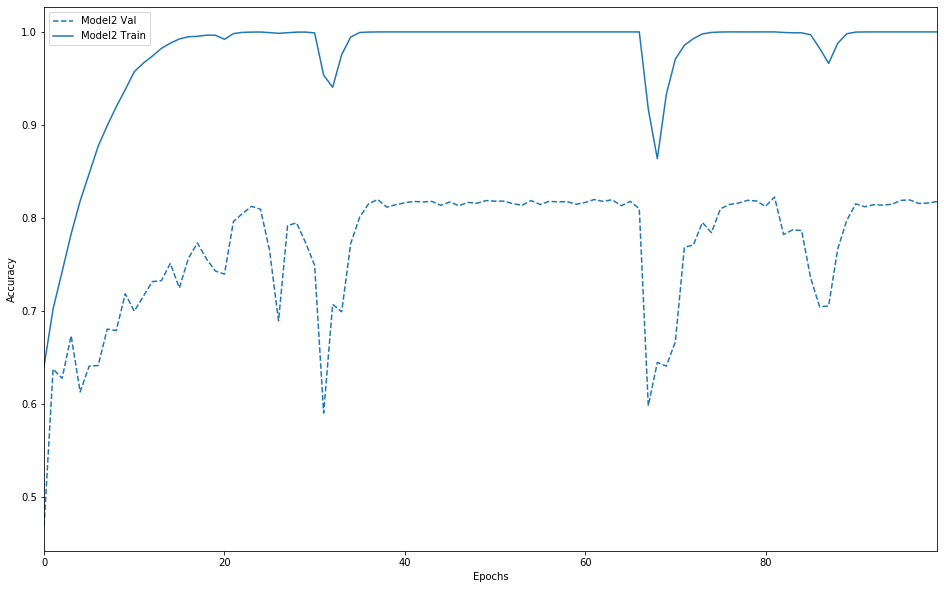

In [14]:
plot_history(a)

In [10]:
a = []